# Importing Libraries

In [1]:
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Importing Data and some Data Cleaning

In [2]:
xls = pd.ExcelFile("MasterDB10.xlsx")

In [3]:
annual_data_output = pd.read_excel(xls, 'Output')
output_pp = pd.read_excel(xls, 'Output (PPY)')
annual_data_ic = pd.read_excel(xls, 'Intermediate Consumption')
cim_pp = pd.read_excel(xls, 'Intermediate Consumption (PPY)')
work_capital = pd.read_excel(xls, 'Work')
gfcf = pd.read_excel(xls, 'Gross Fixed Capital Formation')
capital_stock_2000 = pd.read_excel(xls, 'Capital Stock(2000)')
capital_stock_2016 = pd.read_excel(xls, 'Capital Stock(2016)')
net_capital_stock = pd.read_excel(xls, 'Net Capital Stock')
capital_consumption = pd.read_excel(xls, 'Capital Consumption')
gfcp_price_deflator = pd.read_excel(xls, 'GFCP Price Deflator')
paper_data = pd.read_excel(xls, 'Paper Data')
average_coefs = pd.read_excel(xls, 'Average Coefs')
compensation = pd.read_excel(xls, 'Compensantion of Emp')
real_gdp = pd.read_excel(xls, 'Real GDP')

In [4]:
annual_data_output['Years'] = pd.to_datetime(annual_data_output['Years'], format='%Y')
output_pp['Years'] = pd.to_datetime(output_pp['Years'], format='%Y')
annual_data_ic['Years'] = pd.to_datetime(annual_data_ic['Years'], format='%Y')
cim_pp['Years'] = pd.to_datetime(cim_pp['Years'], format='%Y')
work_capital['Years'] = pd.to_datetime(work_capital['Years'], format='%Y')
gfcf['Years'] = pd.to_datetime(gfcf['Years'], format='%Y')
capital_stock_2000['Years'] = pd.to_datetime(capital_stock_2000['Years'], format='%Y')
capital_stock_2016['Years'] = pd.to_datetime(capital_stock_2016['Years'], format='%Y')
net_capital_stock['Years'] = pd.to_datetime(net_capital_stock['Years'], format='%Y')
capital_consumption['Years'] = pd.to_datetime(capital_consumption['Years'], format='%Y')
gfcp_price_deflator['Years'] = pd.to_datetime(gfcp_price_deflator['Years'], format='%Y')
compensation['Years'] = pd.to_datetime(compensation['Years'], format='%Y')
real_gdp['Years'] = pd.to_datetime(real_gdp['Years'], format='%Y')

In [5]:
annual_data_output= annual_data_output.set_index("Years")
output_pp= output_pp.set_index("Years")
annual_data_ic= annual_data_ic.set_index("Years")
cim_pp= cim_pp.set_index("Years")
work_capital= work_capital.set_index("Years")
gfcf= gfcf.set_index("Years")
capital_stock_2000= capital_stock_2000.set_index("Years")
capital_stock_2016= capital_stock_2016.set_index("Years")
net_capital_stock= net_capital_stock.set_index("Years")
capital_consumption= capital_consumption.set_index("Years")
gfcp_price_deflator= gfcp_price_deflator.set_index("Years")
average_coefs= average_coefs.set_index("Variable")
compensation= compensation.set_index("Years")
real_gdp= real_gdp.set_index("Years")

# Data processing

First I need to get our capital stock data at constant prices to achieve this I  need to start by rebasing the gross fixed capital formation deflator that was based in 2016 to 2000

In [6]:
gfcp_price_deflator_2000 = gfcp_price_deflator / gfcp_price_deflator.loc['2000-01-01']

gfcp_price_deflator_2000 = gfcp_price_deflator_2000.loc['1995-01-01':'2021-01-01']

gfcp_price_deflator_2000

,National currency: 2015 = 100
Years,
1995-01-01,0.853606
1996-01-01,0.880063
1997-01-01,0.912363
1998-01-01,0.934710
1999-01-01,0.954919
2000-01-01,1.000000
2001-01-01,1.023897
2002-01-01,1.050810
2003-01-01,1.067477


Then I divide our gross fixed capital formation data by the new rebased deflator

In [7]:
gfcf_t = gfcf.div(gfcp_price_deflator_2000.iloc[:, 0], axis=0)

gfcf_t

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,779.896518,3194.607841,1345.700005,3078.617499,1021.323016,1083.826124,7758.656161,947.676588,4686.927089,384.719849
1996-01-01,830.938170,3530.612853,1399.114492,3235.266977,1081.240684,1134.942517,7594.422717,1060.387633,5274.210609,400.351987
1997-01-01,837.718398,4309.736796,1672.411683,3832.000243,1245.543059,1156.506099,8288.748752,1221.793732,6124.287129,469.998402
1998-01-01,956.754972,5775.840269,1762.526143,4327.736936,1373.494059,1171.085726,9249.389924,1361.149048,6049.149772,553.230686
1999-01-01,1034.813566,5609.761386,1848.768578,4803.640547,1742.089358,893.436110,10133.786556,1541.668143,6383.613515,566.237633
2000-01-01,952.087000,6113.075000,2029.788000,5187.519000,1757.775000,798.238000,10620.905000,1761.110000,6110.657000,628.808000
2001-01-01,977.704830,5605.777969,1808.687865,5510.675625,2128.247366,922.291051,10585.943178,1695.728256,6581.953348,492.656021
2002-01-01,1059.112467,5073.550750,1236.470881,5637.528048,2094.423296,1155.907318,10388.857853,1754.874766,6064.718490,612.642612
2003-01-01,978.394750,4827.638879,1184.981849,5814.123732,1782.236810,810.301216,8984.984229,1888.883594,5637.350855,603.623248


I calculate the depreciation rate and filter the data for the timeframe relevant to the thesis.

In [8]:
d_t = capital_consumption / net_capital_stock

d_t = d_t.loc['1995-01-01':'2021-01-01']

d_t

,Total Economy
Years,
1995-01-01,0.054708
1996-01-01,0.054238
1997-01-01,0.053559
1998-01-01,0.053228
1999-01-01,0.053385
2000-01-01,0.053677
2001-01-01,0.053932
2002-01-01,0.054008
2003-01-01,0.053903


I then start a variable to hold the capital stock data based in 2000 and introduce the baseline year to calculate the rest of the dataframe

In [9]:
capital_stock_constant_2000 = pd.DataFrame(index=d_t.index, columns=capital_stock_2000.columns)

capital_stock_constant_2000.loc['2000-01-01'] = capital_stock_2000.loc['2000-01-01']

capital_stock_constant_2000

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,10059.718,42878.906,8322.807,58734.98,8430.829,10037.164,195147.73,7571.828,75298.745,4023.751
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I then calculate all the periods after 2000 to 2021 for the capital stock using the depreciation rate and the gross fixed capital formation data obtained earlier

In [10]:
d_t_forward = d_t.loc['2000-01-01':'2021-01-01']

# Loop to calculate capital stock for each year from 2001 to 2021
for year in range(2001, 2021 + 1):
    prev_year = year - 1
    year_str = f"{year}-01-01"
    prev_year_str = f"{prev_year}-01-01"

    # Perform calculation for constant prices with depreciation adjustment
    if prev_year_str in capital_stock_constant_2000.index and year_str in gfcf_t.index and year_str in d_t_forward.index:
        capital_stock_constant_2000.loc[year_str] = (
            capital_stock_constant_2000.loc[prev_year_str] * (1 - d_t_forward.loc[prev_year_str].values[0])
        ) + gfcf_t.loc[prev_year_str]
    else:
        print(f"Missing data for year {year_str} or {prev_year_str}. Skipping calculation for {year_str}.")

print("\nCapital Stock at Constant Prices (2001 to 2021):")
print(capital_stock_constant_2000.loc['2001-01-01':'2021-01-01'])


Capital Stock at Constant Prices (2001 to 2021):
           Agriculture, forestry and fishing  \
Years                                          
2001-01-01                      10471.828817   
2002-01-01                      10884.770109   
2003-01-01                      11356.013584   
2004-01-01                       11722.28995   
2005-01-01                      12116.930798   
2006-01-01                      12341.837763   
2007-01-01                      12524.612331   
2008-01-01                      12704.670418   
2009-01-01                      12892.887259   
2010-01-01                       12929.97415   
2011-01-01                      13006.967059   
2012-01-01                      13067.320305   
2013-01-01                      13091.225323   
2014-01-01                      13146.558793   
2015-01-01                      13230.476774   
2016-01-01                      13397.755407   
2017-01-01                      13470.170632   
2018-01-01                      13578.

Doing the same for the past periods

In [11]:
d_t_past = d_t.loc['1995-01-01':'2000-01-01']

# Perform backward calculation from 1999 to 1995
for year in range(1999, 1995 - 1, -1):
    next_year = year + 1
    year_str = f"{year}-01-01"
    next_year_str = f"{next_year}-01-01"

    # Ensure data exists for the required indices
    if (next_year_str in capital_stock_constant_2000.index and 
        year_str in gfcf_t.index and 
        year_str in d_t_past.index):
        
        capital_stock_constant_2000.loc[year_str] = (
            (capital_stock_constant_2000.loc[next_year_str] - gfcf_t.loc[year_str]) / 
            (1 - d_t_past.loc[year_str].values[0])
        )
    else:
        print(f"Data missing for year {year_str} or {next_year_str}. Skipping calculation for {year_str}.")

print("\nCapital Stock at Constant Prices (1995 to 1999):")
print(capital_stock_constant_2000.loc['1995-01-01':'1999-01-01'])




Capital Stock at Constant Prices (1995 to 1999):
           Agriculture, forestry and fishing  \
Years                                          
1995-01-01                       7962.139263   
1996-01-01                       8306.443574   
1997-01-01                       8686.853096   
1998-01-01                       9059.316397   
1999-01-01                       9533.866422   

           Industry, energy, water supply and sewerage Construction  \
Years                                                                 
1995-01-01                                29514.141928  1371.981549   
1996-01-01                                31094.091976  2642.623275   
1997-01-01                                 32938.20939  3898.405969   
1998-01-01                                35483.824051  5362.024752   
1999-01-01                                39370.948356  6839.143614   

           Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accomm

To obtain our capital stock data based in 2016, we divide a baseline year of 2016 by the 2016 year calculated with the year 2000 as base and with this gives we get a ratio by which we will multiply the whole 2000 based dataframe we obtained previously.

In [12]:
constant_price_2016_ratio = capital_stock_2016/capital_stock_constant_2000.loc['2016-01-01']

constant_price_2016_ratio

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
2016-01-01,1.171718,1.086639,0.926809,1.246038,0.698358,1.301915,1.721261,0.621148,1.532627,1.228127


In [13]:
capital_stock_constant_2016 = capital_stock_constant_2000 * constant_price_2016_ratio.loc['2016-01-01']

capital_stock_constant_2016

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,9329.380009,32071.223016,1271.564415,67674.28551,2335.254646,8869.90324,354459.24772,1627.517266,99973.91433,3019.357337
1996-01-01,9732.807486,33788.058643,2449.206202,67808.040822,2920.746922,9795.698493,348422.185766,2127.12642,101687.859463,3326.659178
1997-01-01,10178.540081,35791.94888,3613.076509,68161.504678,3517.423356,10741.99351,342596.288819,2670.411861,104255.865615,3637.909224
1998-01-01,10614.961946,38558.113511,4969.571108,69285.694239,4198.870455,11672.340603,338514.434215,3286.303059,108058.323185,4020.285649
1999-01-01,11171.00064,42782.015082,6338.577698,70990.315205,4934.565743,12575.704785,336416.764074,3956.856086,111577.737706,4485.733091
2000-01-01,11787.150275,46593.899304,7713.649809,73186.04394,5887.738024,13067.533126,335900.168781,4703.224601,115404.900125,4941.675317
2001-01-01,12270.02784,50735.582141,9180.828838,75721.479744,6799.257973,13405.344168,336151.381166,5544.678957,118575.662026,5448.676449
2002-01-01,12753.878487,54090.783888,10361.998746,78504.205318,7918.84129,13883.115597,336243.336163,6298.942933,122268.355232,5759.863986
2003-01-01,13306.042837,56682.546354,10948.335749,81288.895739,8953.814909,14638.203703,335965.307782,7048.783787,124959.789432,6201.185602


Having the capital stock data treated and at constant prices, I shift my focus to output and intermediate consumption since these are at current prices too, starting by dividing both the intermediate consumption and output by data for the same years but calculated at previous year prices obtaining this way a ratio that will allow us to create a price base to transform our data to be calculated at constant prices

In [14]:
price_py_ic= annual_data_ic / cim_pp

price_py_ic

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,1.027547,1.000822,1.018852,1.032067,1.013776,1.010521,1.078966,1.039217,0.998356,1.051082
1997-01-01,0.996496,1.005426,1.019478,1.011016,1.011892,1.030912,1.097753,1.046078,1.035749,1.044203
1998-01-01,0.971089,0.976144,1.015968,1.020914,1.029178,0.984043,0.907846,1.012378,1.006828,1.022278
1999-01-01,0.945707,0.992432,1.008247,1.007625,1.007357,0.936952,0.902969,0.978734,0.999079,1.011916
2000-01-01,1.033768,1.090104,1.039531,1.063142,1.045708,1.002690,0.971633,1.012214,1.054509,1.028483
2001-01-01,1.032464,1.004563,1.031496,1.007999,0.988231,1.055669,1.137229,1.016590,1.011070,1.003948
2002-01-01,1.027830,0.982818,1.035216,0.995091,0.994701,0.991080,0.949881,1.000283,0.993448,0.965529
2003-01-01,1.028119,1.001790,1.019410,1.016728,0.995297,1.006664,0.962794,1.009525,1.014715,1.005078


In [15]:
price_py_out= annual_data_output / output_pp

price_py_out

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,0.991703,0.999028,1.029214,1.032670,1.030898,0.961964,1.039082,1.042091,1.043326,1.074917
1997-01-01,0.991265,1.008291,1.037833,1.026821,1.035251,1.039652,1.048978,1.048071,1.058162,1.033048
1998-01-01,1.015170,0.992204,1.027247,1.022546,1.033798,0.964686,1.040057,1.052572,1.035819,1.043766
1999-01-01,0.945136,1.004782,1.021570,1.005725,1.020535,0.949030,1.038667,1.037322,1.049309,1.053755
2000-01-01,1.052243,1.062790,1.044961,1.041459,1.041606,1.021265,1.034427,1.035780,1.073880,1.055101
2001-01-01,1.034256,1.007812,1.036548,1.027779,1.002610,1.032708,1.040553,1.020027,1.042368,1.037236
2002-01-01,0.972940,0.996581,1.047280,1.021372,1.005268,0.969067,1.059499,1.017300,1.037435,1.029777
2003-01-01,1.024014,0.999645,1.028704,1.027723,1.005538,0.994312,1.057457,1.027084,1.038732,1.028155


Setting the 2016 year as our base year, we use the ratio previously obtained before to calculate all the forward values by setting that the price base for a certain year will be equal to the ratio of that year times the price base of the year before.

For the past years we set that the price base for a certain year will be the division between the price base for the next year and the ratio of that next year as well

In [16]:
prices_base_2016_cim = pd.DataFrame(index=annual_data_output.index, columns=annual_data_output.columns)
prices_base_2016_out = pd.DataFrame(index=annual_data_output.index, columns=annual_data_output.columns)
prices_base_2016_cim.loc['2016-01-01'] = 1
prices_base_2016_out.loc['2016-01-01'] = 1

In [17]:
for year in prices_base_2016_out.index[prices_base_2016_out.index > '2016-01-01']:
    previous_year = year - pd.DateOffset(years=1)
    
    # Perform the calculation: current year value = price_py_out * previous year value from new_dataframe
    if previous_year in prices_base_2016_out.index:
        prices_base_2016_out.loc[year] = price_py_out.loc[year] * prices_base_2016_out.loc[previous_year]

for year in sorted(prices_base_2016_out.index[prices_base_2016_out.index < '2016-01-01'], reverse=True):
    next_year = year + pd.DateOffset(years=1)
    
    # Calculate the value: current year value = next year's value in new_dataframe divided by price_py_out of next year
    if next_year in price_py_out.index:
        prices_base_2016_out.loc[year] = prices_base_2016_out.loc[next_year] / price_py_out.loc[next_year]


prices_base_2016_out

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,0.949035,0.791235,0.604222,0.691311,0.859398,1.044631,0.453457,0.667575,0.588185,0.568726
1996-01-01,0.941161,0.790466,0.621873,0.713896,0.885951,1.004897,0.471179,0.695674,0.613669,0.611334
1997-01-01,0.932939,0.79702,0.645401,0.733043,0.917182,1.044743,0.494257,0.729116,0.649361,0.631537
1998-01-01,0.947092,0.790806,0.662986,0.74957,0.948181,1.007849,0.514055,0.767447,0.67262,0.659177
1999-01-01,0.895131,0.794587,0.677287,0.753861,0.967652,0.956479,0.533933,0.79609,0.705787,0.694611
2000-01-01,0.941895,0.844479,0.707738,0.785116,1.007913,0.976819,0.552314,0.824574,0.75793,0.732885
2001-01-01,0.97416,0.851076,0.733605,0.806925,1.010544,1.008769,0.574712,0.841087,0.790043,0.760174
2002-01-01,0.947799,0.848166,0.768289,0.824171,1.015868,0.977565,0.608907,0.855639,0.819618,0.78281
2003-01-01,0.97056,0.847865,0.790342,0.847019,1.021493,0.972005,0.643893,0.878813,0.851363,0.804849


In [18]:
for year in prices_base_2016_cim.index[prices_base_2016_cim.index > '2016-01-01']:
    previous_year = year - pd.DateOffset(years=1)
    
    # Perform the calculation: current year value = price_py_out * previous year value from new_dataframe
    if previous_year in prices_base_2016_cim.index: 
        prices_base_2016_cim.loc[year] = price_py_out.loc[year] * prices_base_2016_cim.loc[previous_year]

for year in sorted(prices_base_2016_cim.index[prices_base_2016_cim.index < '2016-01-01'], reverse=True):
    next_year = year + pd.DateOffset(years=1)
    
    # Calculate the value: current year value = next year's value in new_dataframe divided by price_py_out of next year
    if next_year in price_py_out.index:
        prices_base_2016_cim.loc[year] = prices_base_2016_cim.loc[next_year] / price_py_out.loc[next_year]


prices_base_2016_cim

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,0.949035,0.791235,0.604222,0.691311,0.859398,1.044631,0.453457,0.667575,0.588185,0.568726
1996-01-01,0.941161,0.790466,0.621873,0.713896,0.885951,1.004897,0.471179,0.695674,0.613669,0.611334
1997-01-01,0.932939,0.79702,0.645401,0.733043,0.917182,1.044743,0.494257,0.729116,0.649361,0.631537
1998-01-01,0.947092,0.790806,0.662986,0.74957,0.948181,1.007849,0.514055,0.767447,0.67262,0.659177
1999-01-01,0.895131,0.794587,0.677287,0.753861,0.967652,0.956479,0.533933,0.79609,0.705787,0.694611
2000-01-01,0.941895,0.844479,0.707738,0.785116,1.007913,0.976819,0.552314,0.824574,0.75793,0.732885
2001-01-01,0.97416,0.851076,0.733605,0.806925,1.010544,1.008769,0.574712,0.841087,0.790043,0.760174
2002-01-01,0.947799,0.848166,0.768289,0.824171,1.015868,0.977565,0.608907,0.855639,0.819618,0.78281
2003-01-01,0.97056,0.847865,0.790342,0.847019,1.021493,0.972005,0.643893,0.878813,0.851363,0.804849


We then multiply our data calculated at current prices by our price base, and we get our output and intermediate consumption at constant prices

In [19]:
constant_output = annual_data_output * prices_base_2016_out

constant_output

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,6498.601856,46430.715918,10559.249528,23837.877459,5543.300031,6761.659873,3535.756155,6197.320337,11978.891058,1965.205565
1996-01-01,6775.325093,48933.264,11925.701463,26418.852557,6159.192657,6701.329854,3957.870768,7033.914883,13332.264799,2326.006293
1997-01-01,6298.380289,52779.504889,14607.224062,29310.499553,6966.498283,8019.557348,4449.54299,8006.92668,15147.42009,2531.406813
1998-01-01,6471.395657,54513.851421,16618.548906,32805.054032,7822.481465,8845.738329,5022.762011,9308.515335,16995.909829,2720.225658
1999-01-01,6246.926332,56379.285715,17942.723209,34562.160954,8534.468324,9269.095733,5644.021863,10615.584758,19407.964053,3060.88736
2000-01-01,6681.521834,65399.405865,20642.810963,39014.090432,9976.400996,10061.195193,6265.0343,11938.149864,23345.540058,3620.691622
2001-01-01,7119.530238,67710.002933,23031.611023,42482.778414,11219.78782,11880.96485,6996.815735,12683.305036,25970.864883,3885.861061
2002-01-01,6795.446577,67349.49264,24821.961753,44770.994127,11491.799242,11870.005638,7977.510066,13020.68051,28524.808704,4163.75465
2003-01-01,6966.474248,67351.660577,24411.617063,46784.219396,11813.730391,12321.694877,8928.281142,13905.547782,31041.326434,4423.64783


In [20]:
constant_cim = annual_data_ic * prices_base_2016_cim

constant_cim

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,2442.649503,32993.84616,7471.744903,11563.061392,3264.348817,1760.936163,797.442287,3226.188411,3255.383041,1071.454285
1996-01-01,2698.741804,34275.457446,8530.747856,13227.981862,3659.954219,2002.715013,1007.235985,3755.933787,3639.019893,1226.12609
1997-01-01,2640.918225,36872.793845,10504.217901,14277.805791,4117.122062,2388.01578,1173.202098,4265.387741,4050.249471,1295.567198
1998-01-01,2736.235252,37785.605372,11938.11412,16122.24315,4674.374874,2951.759879,1290.937994,4887.288427,4394.894211,1389.924753
1999-01-01,2725.519454,38797.942734,12784.021414,16850.166117,4970.316897,3243.19312,1369.06079,5418.73787,5076.625139,1512.131311
2000-01-01,2920.19124,46137.342489,14554.283196,18991.677697,5898.080627,3683.562434,1517.921981,6083.412389,6128.467352,1695.301256
2001-01-01,3203.447554,47663.085379,16262.946914,20748.606275,6750.787242,4207.027494,1940.24454,6555.868629,6568.694245,1840.423332
2002-01-01,3116.470896,46979.496378,17539.006342,21461.983278,6647.195069,4276.944931,2083.467893,6543.405979,6970.080263,1832.853862
2003-01-01,3207.959196,47090.287601,17173.818948,22494.466362,6814.973957,4336.657865,2195.274887,6959.961262,7608.714276,1898.106098


We now start our OLS regressions to calculate the coefficients for our variables in each sector, one of the OLS regressions will have no restrictions while the second one will assume constant returns to scale.

In [21]:
constant_output_cleaned = constant_output.apply(pd.to_numeric, errors='coerce')
capital_stock_constant_2016_cleaned = capital_stock_constant_2016.apply(pd.to_numeric, errors='coerce')
work_capital_cleaned = work_capital.apply(pd.to_numeric, errors='coerce')
constant_cim_cleaned = constant_cim.apply(pd.to_numeric, errors='coerce')

Delta_ln_Prod = np.log(constant_output_cleaned).diff()
Delta_ln_K = np.log(capital_stock_constant_2016_cleaned).diff()
Delta_ln_H = np.log(work_capital_cleaned).diff()
Delta_ln_IC = np.log(constant_cim_cleaned).diff()

In [22]:
results = {}

for col in Delta_ln_Prod.columns:
    y = Delta_ln_Prod[col]
    
    X = pd.concat([Delta_ln_K[col], Delta_ln_H[col], Delta_ln_IC[col]], axis=1)
    
    # Standardize the column names to 'K', 'H', 'IC'
    X.columns = ['K', 'H', 'IC']
    
    data = pd.concat([y, X], axis=1).dropna()

    y = data.iloc[:, 0]
    X = data.iloc[:, 1:]

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    
    results[col] = {
        'model': model,
        'gamma': model.params['IC'] 
    }

# Create the coefficient table
coef_table_constant = pd.DataFrame(index=['const', 'K', 'H', 'IC'])

# Loop through each model in results
for sector in results:
    # Extract the coefficients from the model
    params = results[sector]['model'].params
    # Add the coefficients to the table
    coef_table_constant[sector] = params[['const', 'K', 'H', 'IC']]

# Display the coefficient table
coef_table_constant

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
const,0.004787,0.005776,0.009482,0.011120,-0.004269,-0.016583,0.109461,0.008793,0.005207,0.007474
K,-0.534539,0.075808,0.025127,0.232661,0.126728,-0.593091,2.105423,0.061690,0.126050,0.403681
H,-0.057554,0.195577,0.137362,0.341586,0.271617,-0.397715,0.262051,0.253257,0.587698,0.409698
IC,0.706675,0.815006,0.789235,0.662940,0.759104,1.102636,0.035403,0.752412,0.762193,0.625871


In [23]:
# Initialize a dictionary to store the results without constant
results_no_constant = {}

for col in Delta_ln_Prod.columns:
    y = Delta_ln_Prod[col]
    
    X = pd.concat([Delta_ln_K[col], Delta_ln_H[col], Delta_ln_IC[col]], axis=1)
    
    # Standardize the column names to 'K', 'H', 'IC'
    X.columns = ['K', 'H', 'IC']
    
    data = pd.concat([y, X], axis=1).dropna()

    y = data.iloc[:, 0]
    X = data.iloc[:, 1:]

    # Do NOT add a constant term
    # X = sm.add_constant(X)  # This line is omitted for no constant

    # Fit the OLS model without a constant
    model = sm.OLS(y, X).fit()
    
    results_no_constant[col] = {
        'model': model,
        'gamma': model.params['IC'] 
    }

# Create the coefficient table for the model without constant
coef_table_no_constant = pd.DataFrame(index=['K', 'H', 'IC'])

# Loop through each model in results_no_constant
for sector in results_no_constant:
    # Extract the coefficients from the model
    params = results_no_constant[sector]['model'].params
    # Add the coefficients to the table
    coef_table_no_constant[sector] = params[['K', 'H', 'IC']]

# Display the coefficient table for the model without constant
coef_table_no_constant

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
K,-0.441048,0.163429,0.041438,0.404029,0.100695,-0.572475,-2.652966,0.119998,0.118912,0.500487
H,-0.117495,0.169315,0.021411,0.218316,0.217130,-0.327471,0.209728,0.362739,0.597914,0.340013
IC,0.718689,0.824354,0.854036,0.767009,0.768339,0.987938,0.133889,0.714394,0.801682,0.650181


In [24]:
# Adjusted variables
Adjusted_Prod = Delta_ln_Prod - Delta_ln_IC
Adjusted_K = Delta_ln_K - Delta_ln_IC
Adjusted_H = Delta_ln_H - Delta_ln_IC

results_adjusted = {}

for col in Delta_ln_Prod.columns:
    # Retrieve the gamma coefficient from the first regression
    gamma = results[col]['gamma']
    
    y = Delta_ln_Prod[col] - gamma * Delta_ln_IC[col]
    
    X = pd.concat([Delta_ln_K[col], Delta_ln_H[col]], axis=1)
    
    # Standardize the column names to 'K' and 'H'
    X.columns = ['K', 'H']
    
    data = pd.concat([y, X], axis=1).dropna()
    
    # Redefine y and X after dropping NaNs
    y = data.iloc[:, 0]
    X = data.iloc[:, 1:]
    
    # Add a constant (intercept) to the independent variables
    X = sm.add_constant(X)
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    results_adjusted[col] = model

# Create the coefficient table
coef_table_crts_constant = pd.DataFrame(index=['K', 'H'])

# Loop through each model in results_adjusted
for sector in results_adjusted:
    # Extract the coefficients from the model
    params = results_adjusted[sector].params
    
    # Add the coefficients to the table
    coef_table_crts_constant[sector] = params[['K', 'H']]

# Display the coefficient table
coef_table_crts_constant


,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
K,-0.534539,0.075808,0.025127,0.232661,0.126728,-0.593091,2.105423,0.061690,0.126050,0.403681
H,-0.057554,0.195577,0.137362,0.341586,0.271617,-0.397715,0.262051,0.253257,0.587698,0.409698


In [26]:
# Initialize a dictionary to store the adjusted models without constant
results_adjusted_no_constant = {}

for col in Delta_ln_Prod.columns:
    # Retrieve the gamma coefficient from the first regression
    gamma = results[col]['gamma']
    
    y = Delta_ln_Prod[col] - gamma * Delta_ln_IC[col]
    
    X = pd.concat([Delta_ln_K[col], Delta_ln_H[col]], axis=1)
    
    # Standardize the column names to 'K' and 'H'
    X.columns = ['K', 'H']
    
    data = pd.concat([y, X], axis=1).dropna()
    
    # Redefine y and X after dropping NaNs
    y = data.iloc[:, 0]
    X = data.iloc[:, 1:]
    
    # Do NOT add a constant term
    # X = sm.add_constant(X)  # This line is omitted for no constant
    
    # Fit the OLS model without a constant
    model = sm.OLS(y, X).fit()
    
    results_adjusted_no_constant[col] = model

# Create the coefficient table for the adjusted model without constant
coef_table_crts_no_constant = pd.DataFrame(index=['K', 'H'])

# Loop through each model in results_adjusted_no_constant
for sector in results_adjusted_no_constant:
    # Extract the coefficients from the model
    params = results_adjusted_no_constant[sector].params
    
    # Add the coefficients to the table
    coef_table_crts_no_constant[sector] = params[['K', 'H']]

# Display the coefficient table for the model without constant
coef_table_crts_no_constant


,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
K,-0.432670,0.174352,0.054794,0.550779,0.104345,-0.699878,-2.730302,0.109853,0.160397,0.517865
H,-0.122587,0.184076,0.098731,0.348861,0.222163,-0.246792,0.335071,0.306226,0.706469,0.373018


I then calculate the average of the coefficients between the two OLS regressions, while also switching between using a constant or not using one, and this average will be the values used to calculate the markups for our thesis.

Due to Agriculture, forestry and fishing and Financial and insurance activities, having negative values for their respective betas, I chose to use the ratio between labour and materials from  Costa (2021) in table 3.

In [27]:
paper_ratio= paper_data['Labour'] / paper_data['Materials']

average_paper_ratio = sum(paper_ratio) / len(paper_ratio)

average_paper_ratio

0.5452080640871491

In [28]:
average_coefs

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Variable,,,,,,,,,,
Beta,-0.088825,0.186150,0.098725,0.312600,0.245625,-0.342425,0.26725,0.293875,0.619950,0.38310
Gamma,1.143200,0.752375,0.831800,0.488975,0.700650,1.507000,0.54925,0.683925,0.495825,0.39295


In [29]:
average_coefs.loc['Beta', 'Agriculture, forestry and fishing'] = average_coefs['Agriculture, forestry and fishing']['Gamma'] *average_paper_ratio
average_coefs.loc['Beta', 'Financial and insurance activities'] = average_coefs['Financial and insurance activities']['Gamma'] *average_paper_ratio

average_coefs

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Variable,,,,,,,,,,
Beta,0.623282,0.186150,0.098725,0.312600,0.245625,0.821629,0.26725,0.293875,0.619950,0.38310
Gamma,1.143200,0.752375,0.831800,0.488975,0.700650,1.507000,0.54925,0.683925,0.495825,0.39295


I then calculate the markups for labour and materials, and doing a cubic spline interpolation to transform our data from anual to quarterly

In [30]:
material_share = annual_data_ic / annual_data_output

gamma_shm = average_coefs.iloc[1].div(material_share)

gamma_shm

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,3.041452,1.058783,1.175520,1.008048,1.189797,5.786593,2.435304,1.313780,1.824496,0.720728
1996-01-01,2.870060,1.074126,1.162829,0.976578,1.179096,5.042607,2.158244,1.280819,1.816552,0.745441
1997-01-01,2.726441,1.076945,1.156706,1.003803,1.185556,5.060885,2.083112,1.283855,1.854323,0.767784
1998-01-01,2.703751,1.085463,1.157914,0.994952,1.172525,4.516129,2.137014,1.302630,1.917452,0.769044
1999-01-01,2.620229,1.093315,1.167454,1.002959,1.203077,4.307029,2.264311,1.339844,1.895542,0.795417
2000-01-01,2.615690,1.066487,1.179769,1.004488,1.185125,4.116184,2.266961,1.342141,1.888776,0.839232
2001-01-01,2.540715,1.068821,1.177996,1.001176,1.164478,4.255882,1.980679,1.323155,1.960360,0.829673
2002-01-01,2.492741,1.078600,1.177199,1.020031,1.211297,4.182448,2.103055,1.360938,2.029146,0.892677
2003-01-01,2.482598,1.076097,1.182357,1.016975,1.214574,4.281821,2.233824,1.366437,2.022821,0.915793


In [31]:
gamma_shm.index = pd.to_datetime(gamma_shm.index)

# Create a quarterly date range from the start to the end of your data
new_index = pd.date_range(start=gamma_shm.index[0], end=gamma_shm.index[-1], freq='QE')

gamma_shm_quarterly = pd.DataFrame(index=new_index)

timestamps_unix = (gamma_shm.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
new_index_unix = (new_index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

for column in gamma_shm.columns:
    y_known = gamma_shm[column].values

    valid_indices = ~pd.isnull(y_known)
    cs = CubicSpline(timestamps_unix[valid_indices], y_known[valid_indices])

    interpolated_data = cs(new_index_unix)
    gamma_shm_quarterly[column] = interpolated_data


gamma_shm_quarterly['Real estate activities']

1995-03-31    2.344659
1995-06-30    2.268233
1995-09-30    2.206376
1995-12-31    2.158689
1996-03-31    2.124160
                ...   
2019-12-31    3.855041
2020-03-31    3.860705
2020-06-30    3.831588
2020-09-30    3.748770
2020-12-31    3.594090
Freq: QE-DEC, Name: Real estate activities, Length: 104, dtype: float64

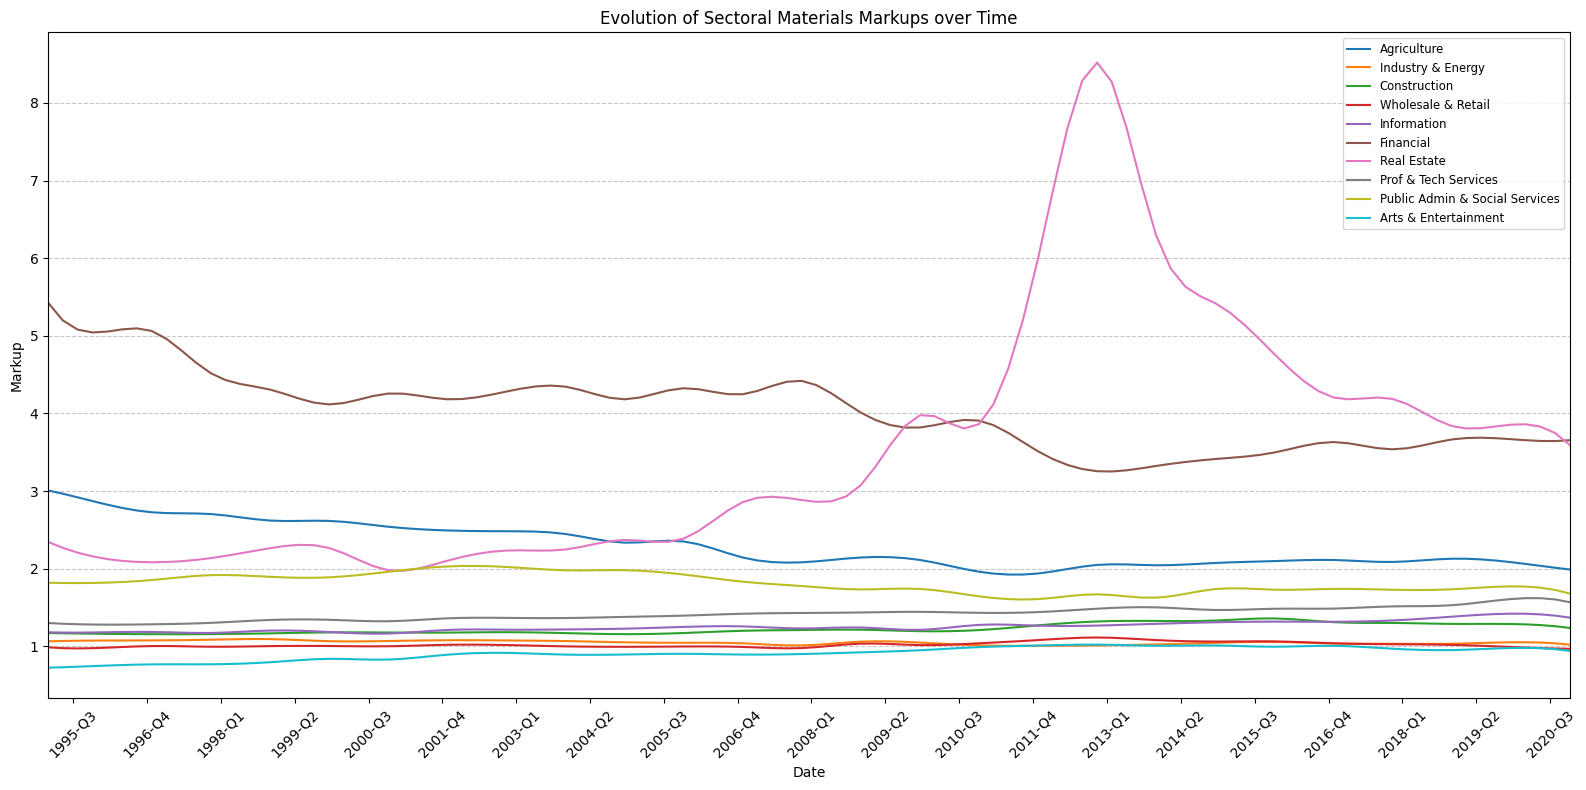

In [32]:
# Define shorter labels for the sectors
short_labels = {
    'Agriculture, forestry and fishing': 'Agriculture',
    'Industry, energy, water supply and sewerage': 'Industry & Energy',
    'Construction': 'Construction',
    'Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities': 'Wholesale & Retail',
    'Information and communication': 'Information',
    'Financial and insurance activities': 'Financial',
    'Real estate activities': 'Real Estate',
    'Professional, scientific and technical activities; administrative and support service activities': 'Prof & Tech Services',
    'Public administration and defence; compulsory social security; education; human health and social work activities': 'Public Admin & Social Services',
    'Arts; entertainment; repair of household goods and other services': 'Arts & Entertainment'
}

colors = plt.get_cmap('tab10', len(gamma_shm.columns))

plt.figure(figsize=(16, 8))  # Increase figure size for better spacing
for idx, column in enumerate(gamma_shm.columns):
    plt.plot(gamma_shm_quarterly.index, gamma_shm_quarterly[column], '-', label=short_labels[column], color=colors(idx))

# Position the legend in the top-right inside the graph
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')

# Set the x-axis to display every 5th quarter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3*5))  # Set major ticks every 5th quarter (15 months)

# Define a function to format the labels with both Year and Quarter
def format_quarter(x, pos=None):
    """Format the x-axis to display 'Year-Q#' for quarters."""
    date = mdates.num2date(x)  # Convert numeric date to datetime
    quarter = (date.month - 1) // 3 + 1  # Calculate the quarter (1-4)
    return f'{date.year}-Q{quarter}'  # Format as 'Year-Q#'

# Apply the custom formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_quarter))

# Set x-axis to start at the first date in your dataset
plt.xlim([gamma_shm_quarterly.index[0], gamma_shm_quarterly.index[-1]])  # Adjust x-axis to match your data range

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Markup')
plt.title('Evolution of Sectoral Materials Markups over Time')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

In [33]:
labour_share  = compensation / annual_data_output

beta_shl = average_coefs.iloc[0].div(labour_share)

beta_shl

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
Years,,,,,,,,,,
1995-01-01,6.194137,1.158143,0.645622,1.230969,1.466103,2.246613,8.719346,0.997285,1.011962,1.091203
1996-01-01,6.642918,1.127475,0.655952,1.256437,1.431816,2.174153,8.442729,0.981850,1.003979,1.079423
1997-01-01,6.118182,1.128786,0.668096,1.243970,1.439913,2.326094,8.184693,0.966066,0.998779,1.040990
1998-01-01,5.896730,1.113898,0.627004,1.233975,1.422680,2.612939,8.035814,0.967873,0.972853,1.028700
1999-01-01,5.980191,1.092158,0.612125,1.194503,1.383521,2.761720,7.843502,0.958743,0.976560,1.032815
2000-01-01,5.876497,1.147673,0.568814,1.197975,1.495262,2.809458,7.073516,0.988587,0.987969,1.063781
2001-01-01,5.822781,1.129549,0.603410,1.169385,1.599725,3.173846,8.313644,0.967364,0.986613,1.025916
2002-01-01,5.888619,1.119455,0.572505,1.171800,1.486560,3.213089,8.645752,0.943646,0.970919,0.991026
2003-01-01,5.647814,1.139488,0.557977,1.162722,1.494260,3.201844,8.863718,0.962686,0.975069,0.972980


In [34]:
beta_shl.index = pd.to_datetime(beta_shl.index)

new_index = pd.date_range(start=beta_shl.index[0], end=beta_shl.index[-1], freq='QE')

beta_shl_quarterly = pd.DataFrame(index=new_index)

timestamps_unix = (beta_shl.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
new_index_unix = (new_index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

for column in beta_shl.columns:
    y_known = beta_shl[column].values

    valid_indices = ~pd.isnull(y_known)
    cs = CubicSpline(timestamps_unix[valid_indices], y_known[valid_indices])

    interpolated_data = cs(new_index_unix)
    beta_shl_quarterly[column] = interpolated_data


beta_shl_quarterly

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services
1995-03-31,6.477431,1.144895,0.642301,1.244490,1.450103,2.206660,8.651915,0.995665,1.007143,1.094747
1995-06-30,6.634940,1.135741,0.643890,1.252705,1.439557,2.180989,8.582613,0.992172,1.004634,1.093329
1995-09-30,6.682851,1.130177,0.648972,1.256355,1.433783,2.170155,8.512702,0.987369,1.003823,1.087866
1995-12-31,6.643729,1.127491,0.655873,1.256451,1.431821,2.174032,8.443476,0.981911,1.003975,1.079525
1996-03-31,6.543916,1.126845,0.662840,1.254160,1.432544,2.191855,8.376196,0.976481,1.004314,1.069597
...,...,...,...,...,...,...,...,...,...,...
2019-12-31,4.705178,1.270755,0.426315,0.963753,0.856865,3.344090,8.635036,0.743299,1.066492,0.813518
2020-03-31,4.692630,1.262384,0.426642,0.938651,0.843452,3.364055,8.630770,0.730195,1.063882,0.789175
2020-06-30,4.725291,1.274761,0.427704,0.934499,0.829689,3.365798,8.558620,0.725570,1.067221,0.782799
2020-09-30,4.825787,1.314669,0.429695,0.959552,0.815660,3.341883,8.387062,0.732899,1.078553,0.801820


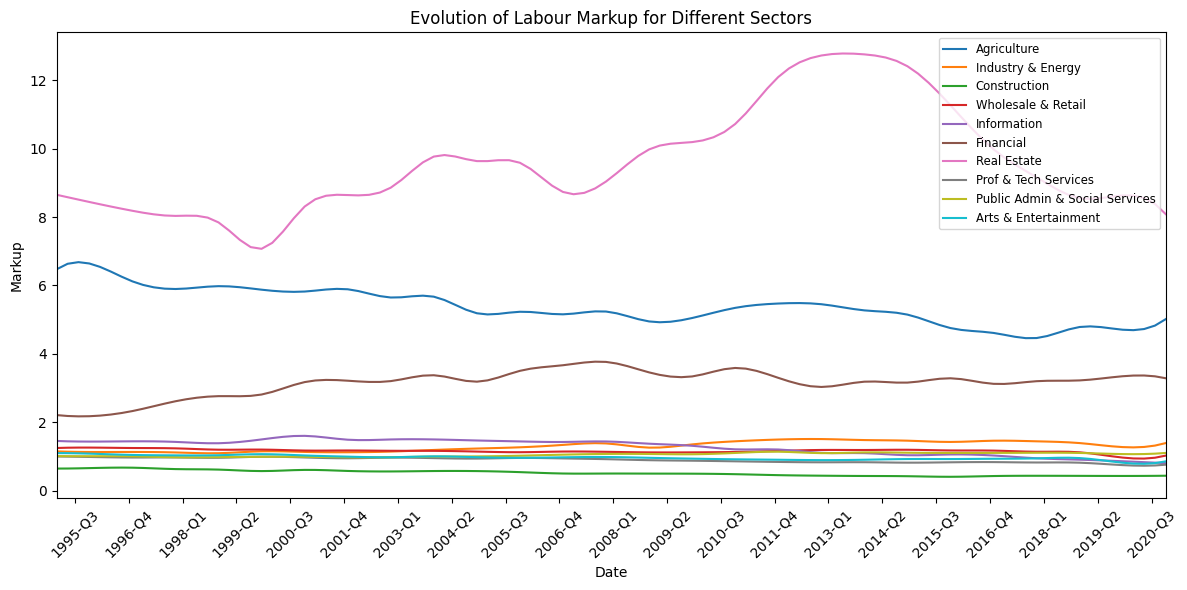

In [35]:
# Define shorter labels for the sectors
short_labels = {
    'Agriculture, forestry and fishing': 'Agriculture',
    'Industry, energy, water supply and sewerage': 'Industry & Energy',
    'Construction': 'Construction',
    'Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities': 'Wholesale & Retail',
    'Information and communication': 'Information',
    'Financial and insurance activities': 'Financial',
    'Real estate activities': 'Real Estate',
    'Professional, scientific and technical activities; administrative and support service activities': 'Prof & Tech Services',
    'Public administration and defence; compulsory social security; education; human health and social work activities': 'Public Admin & Social Services',
    'Arts; entertainment; repair of household goods and other services': 'Arts & Entertainment'
}

# Set distinct colors for each line using plt.get_cmap
colors = plt.get_cmap('tab10', len(beta_shl.columns))

plt.figure(figsize=(12, 6))
for idx, column in enumerate(beta_shl.columns):
    plt.plot(beta_shl_quarterly.index, beta_shl_quarterly[column], '-', label=short_labels[column], color=colors(idx))

# Position the legend in the top-right inside the graph
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize='small')

# Set x-axis to display every 5th quarter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3*5))  # Set major ticks every 5th quarter (15 months)

# Define a function to format the labels with both Year and Quarter
def format_quarter(x, pos=None):
    """Format the x-axis to display 'Year-Q#' for quarters."""
    date = mdates.num2date(x)  # Convert numeric date to datetime
    quarter = (date.month - 1) // 3 + 1  # Calculate the quarter (1-4)
    return f'{date.year}-Q{quarter}'  # Format as 'Year-Q#'

# Apply the custom formatter for the x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_quarter))

# Set x-axis to start at the first date in your dataset
plt.xlim([beta_shl_quarterly.index[0], beta_shl_quarterly.index[-1]])  # Adjust x-axis to match your data range

plt.xlabel('Date')
plt.ylabel('Markup')
plt.title('Evolution of Labour Markup for Different Sectors')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()


Here I calculate the correlation between the 2 markups

In [36]:
correlations = {}

for col in beta_shl.columns:
    correlations[col] = beta_shl_quarterly[col].corr(gamma_shm_quarterly[col])

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Sector', 'Correlation'])

Here I start to work to create an aggregate markup for the portuguese economy by calculating the weight of every sector in the total economy and then interpolating the weights so they are also quarterly.

In [37]:
annual_data_output['Total'] = annual_data_output.sum(axis=1)

sector_outputs = annual_data_output.drop(columns=['Total'])

weights = sector_outputs.div(annual_data_output['Total'], axis=0)

weights.index = pd.to_datetime(weights.index)

new_index = pd.date_range(start=weights.index[0], end=weights.index[-1], freq='QE')

weights_quarterly = pd.DataFrame(index=new_index)

timestamps_unix = (weights.index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
new_index_unix = (new_index - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

for column in weights.columns:
    y_known = weights[column].values

    valid_indices = ~pd.isnull(y_known)
    cs = CubicSpline(timestamps_unix[valid_indices], y_known[valid_indices])

    interpolated_data = cs(new_index_unix)
    weights_quarterly[column] = interpolated_data

weights_quarterly['Total'] = weights_quarterly.sum(axis=1)

weights_quarterly

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services,Total
1995-03-31,0.040819,0.340999,0.101221,0.202259,0.037746,0.036883,0.045806,0.054687,0.119108,0.020470,1.0
1995-06-30,0.040909,0.339874,0.101565,0.202654,0.037835,0.036393,0.045953,0.055011,0.119133,0.020671,1.0
1995-09-30,0.040369,0.339047,0.102843,0.202606,0.037919,0.036269,0.045979,0.055190,0.118999,0.020778,1.0
1995-12-31,0.039362,0.338377,0.104798,0.202283,0.037999,0.036448,0.045915,0.055266,0.118755,0.020797,1.0
1996-03-31,0.038073,0.337714,0.107145,0.201866,0.038077,0.036851,0.045796,0.055282,0.118455,0.020742,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.027358,0.304404,0.066435,0.201806,0.043350,0.044400,0.077568,0.072304,0.140223,0.022151,1.0
2020-03-31,0.027777,0.305155,0.067596,0.196393,0.044355,0.044826,0.078308,0.072166,0.141861,0.021564,1.0
2020-06-30,0.028012,0.307264,0.068145,0.193775,0.044913,0.044502,0.077995,0.072210,0.142050,0.021134,1.0
2020-09-30,0.027986,0.310971,0.067867,0.195214,0.044863,0.043140,0.076256,0.072531,0.140222,0.020950,1.0


In [38]:
with pd.option_context('display.max_rows', None):
    print(weights_quarterly['Total'])

1995-03-31    1.0
1995-06-30    1.0
1995-09-30    1.0
1995-12-31    1.0
1996-03-31    1.0
1996-06-30    1.0
1996-09-30    1.0
1996-12-31    1.0
1997-03-31    1.0
1997-06-30    1.0
1997-09-30    1.0
1997-12-31    1.0
1998-03-31    1.0
1998-06-30    1.0
1998-09-30    1.0
1998-12-31    1.0
1999-03-31    1.0
1999-06-30    1.0
1999-09-30    1.0
1999-12-31    1.0
2000-03-31    1.0
2000-06-30    1.0
2000-09-30    1.0
2000-12-31    1.0
2001-03-31    1.0
2001-06-30    1.0
2001-09-30    1.0
2001-12-31    1.0
2002-03-31    1.0
2002-06-30    1.0
2002-09-30    1.0
2002-12-31    1.0
2003-03-31    1.0
2003-06-30    1.0
2003-09-30    1.0
2003-12-31    1.0
2004-03-31    1.0
2004-06-30    1.0
2004-09-30    1.0
2004-12-31    1.0
2005-03-31    1.0
2005-06-30    1.0
2005-09-30    1.0
2005-12-31    1.0
2006-03-31    1.0
2006-06-30    1.0
2006-09-30    1.0
2006-12-31    1.0
2007-03-31    1.0
2007-06-30    1.0
2007-09-30    1.0
2007-12-31    1.0
2008-03-31    1.0
2008-06-30    1.0
2008-09-30    1.0
2008-12-31

And here is the calculation of the aggregate mark up for the economy as a whole

In [39]:
weighted_markups_shm = gamma_shm_quarterly * weights_quarterly.drop(columns='Total')

gamma_shm_quarterly['Total'] = weighted_markups_shm.sum(axis=1)

gamma_shm_quarterly['Total']

1995-03-31    1.458989
1995-06-30    1.441702
1995-09-30    1.430984
1995-12-31    1.425568
1996-03-31    1.424061
                ...   
2019-12-31    1.573311
2020-03-31    1.577147
2020-06-30    1.567436
2020-09-30    1.539242
2020-12-31    1.488679
Freq: QE-DEC, Name: Total, Length: 104, dtype: float64

In [40]:
# Dropping the specified column from both gamma_shm_quarterly and weights_quarterly
gamma_shm_excluding_column = gamma_shm_quarterly.drop(columns=["Public administration and defence; compulsory social security; education; human health and social work activities"])
weights_excluding_column = weights_quarterly.drop(columns=["Public administration and defence; compulsory social security; education; human health and social work activities", 'Total'])

# Computing the new weighted markups
weighted_markups_shm = gamma_shm_excluding_column * weights_excluding_column

# Adding the new 'Total excluding Public administration...' column
gamma_shm_quarterly['Total_excluding_Public_admin'] = weighted_markups_shm.sum(axis=1)

# Display the updated gamma_shm_quarterly
gamma_shm_quarterly['Total_excluding_Public_admin']


1995-03-31    1.242286
1995-06-30    1.225345
1995-09-30    1.214999
1995-12-31    1.209847
1996-03-31    1.208371
                ...   
2019-12-31    1.324728
2020-03-31    1.326040
2020-06-30    1.317977
2020-09-30    1.297040
2020-12-31    1.260474
Freq: QE-DEC, Name: Total_excluding_Public_admin, Length: 104, dtype: float64

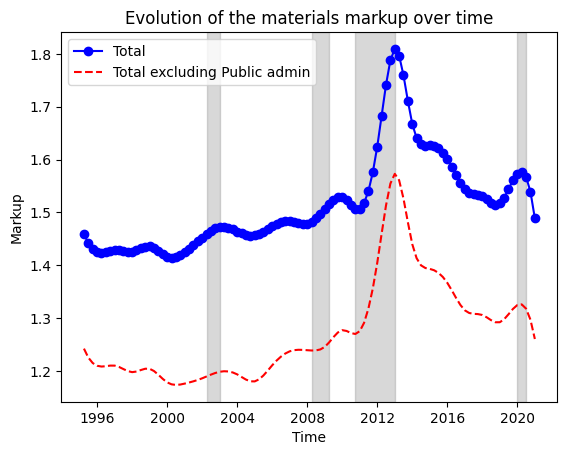

In [41]:
# Plotting the 'Total' column with a solid line
plt.plot(gamma_shm_quarterly['Total'], marker='o', linestyle='-', color='b', label='Total')

# Plotting the 'Total_excluding_Public_admin' column with a dashed line
plt.plot(gamma_shm_quarterly['Total_excluding_Public_admin'], linestyle='--', color='r', label='Total excluding Public admin')

# Highlighting the specified periods in grey
plt.axvspan('2002-04-01', '2002-12-31', color='grey', alpha=0.3)
plt.axvspan('2008-04-01', '2009-03-31', color='grey', alpha=0.3)
plt.axvspan('2010-10-01', '2012-12-31', color='grey', alpha=0.3)
plt.axvspan('2020-01-01', '2020-06-30', color='grey', alpha=0.3)

# Adding labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Markup')
plt.title('Evolution of the materials markup over time')
plt.legend()

# Display the plot
plt.show()

In [42]:
weighted_markups_shl = beta_shl_quarterly * weights_quarterly.drop(columns='Total')

beta_shl_quarterly['Total'] = weighted_markups_shl.sum(axis=1)

beta_shl_quarterly['Total']

1995-03-31    1.700791
1995-06-30    1.701806
1995-09-30    1.695286
1995-12-31    1.683195
1996-03-31    1.667938
                ...   
2019-12-31    1.815095
2020-03-31    1.813451
2020-06-30    1.809394
2020-09-30    1.801874
2020-12-31    1.792251
Freq: QE-DEC, Name: Total, Length: 104, dtype: float64

In [43]:
# Dropping the specified column from both beta_shl_quarterly and weights_quarterly
beta_shl_excluding_column = beta_shl_quarterly.drop(columns=["Public administration and defence; compulsory social security; education; human health and social work activities"])
weights_excluding_column = weights_quarterly.drop(columns=["Public administration and defence; compulsory social security; education; human health and social work activities", 'Total'])

# Computing the new weighted markups
weighted_markups_shl = beta_shl_excluding_column * weights_excluding_column

# Adding the new 'Total excluding Public administration...' column
beta_shl_quarterly['Total_excluding_Public_admin'] = weighted_markups_shl.sum(axis=1)

# Display the updated beta_shl_quarterly
beta_shl_quarterly['Total_excluding_Public_admin']


1995-03-31    1.580832
1995-06-30    1.582121
1995-09-30    1.575832
1995-12-31    1.563968
1996-03-31    1.548972
                ...   
2019-12-31    1.665549
2020-03-31    1.662527
2020-06-30    1.657795
2020-09-30    1.650637
2020-12-31    1.642883
Freq: QE-DEC, Name: Total_excluding_Public_admin, Length: 104, dtype: float64

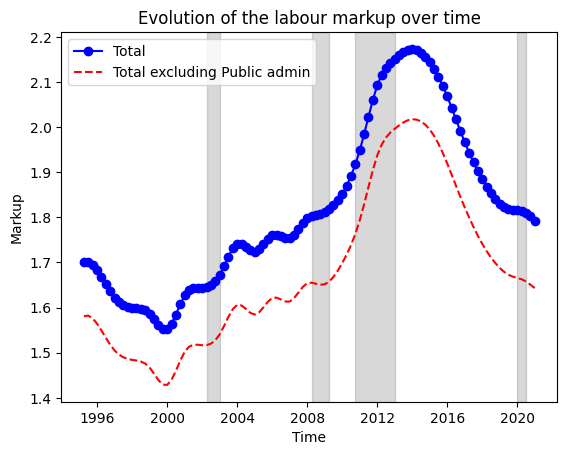

In [44]:
# Plotting the 'Total' column with a solid line
plt.plot(beta_shl_quarterly['Total'], marker='o', linestyle='-', color='b', label='Total')

# Plotting the 'Total_excluding_Public_admin' column with a dashed line
plt.plot(beta_shl_quarterly['Total_excluding_Public_admin'], linestyle='--', color='r', label='Total excluding Public admin')

# Highlighting the specified periods in grey
plt.axvspan('2002-04-01', '2002-12-31', color='grey', alpha=0.3)
plt.axvspan('2008-04-01', '2009-03-31', color='grey', alpha=0.3)
plt.axvspan('2010-10-01', '2012-12-31', color='grey', alpha=0.3)
plt.axvspan('2020-01-01', '2020-06-30', color='grey', alpha=0.3)

# Adding labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Markup')
plt.title('Evolution of the labour markup over time')
plt.legend()

# Display the plot
plt.show()

Correlation between the aggregate markups

In [45]:
gamma_shm_quarterly['Total'].corr(beta_shl_quarterly['Total'])

0.9129145821134256

I then test if there is a linear trend in these markups

In [46]:
df_gamma = gamma_shm_quarterly.copy()

df_gamma['Year'] = df_gamma.index

if np.issubdtype(df_gamma['Year'].dtype, np.datetime64):
    df_gamma['Year'] = df_gamma['Year'].dt.year 
elif df_gamma['Year'].dtype == 'object':
    df_gamma['Year'] = pd.to_datetime(df_gamma['Year']).dt.year 
df_gamma['Year'] = df_gamma['Year'].astype(int)

df_gamma['log_Total'] = np.log(df_gamma['Total'])

X = df_gamma[['Year']]
X = sm.add_constant(X)

Y = df_gamma['log_Total']

model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_Total   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     98.09
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.33e-16
Time:                        10:10:24   Log-Likelihood:                 185.14
No. Observations:                 104   AIC:                            -366.3
Df Residuals:                     102   BIC:                            -361.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2957      1.081     -9.522      0.0

In [47]:
df_beta = beta_shl_quarterly.copy()

df_beta['Year'] = df_beta.index

if np.issubdtype(df_beta['Year'].dtype, np.datetime64):
    df_beta['Year'] = df_beta['Year'].dt.year 
elif df_beta['Year'].dtype == 'object':
    df_beta['Year'] = pd.to_datetime(df_beta['Year']).dt.year 
df_beta['Year'] = df_beta['Year'].astype(int)

df_beta['log_Total'] = np.log(df_beta['Total'])

X = df_beta[['Year']]
X = sm.add_constant(X)

Y = df_beta['log_Total']

model = sm.OLS(Y, X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              log_Total   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           4.06e-20
Time:                        10:10:24   Log-Likelihood:                 136.70
No. Observations:                 104   AIC:                            -269.4
Df Residuals:                     102   BIC:                            -264.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.2134      1.723    -11.153      0.0

Testing the correlation at levels

In [48]:
merged_df_corr_levels = pd.merge(
    gamma_shm_quarterly,
    beta_shl_quarterly,
    left_index=True,
    right_index=True,
    suffixes=('_gamma', '_beta')
)

merged_df_corr_levels['log_Total_gamma'] = np.log(merged_df_corr_levels['Total_gamma'])
merged_df_corr_levels['log_Total_beta'] = np.log(merged_df_corr_levels['Total_beta'])

correlation = merged_df_corr_levels['log_Total_gamma'].corr(merged_df_corr_levels['log_Total_beta'])
print('Correlation coefficient:', correlation)


Correlation coefficient: 0.9157631371506592


In [49]:
corr_coef, p_value = pearsonr(
    merged_df_corr_levels['log_Total_gamma'], 
    merged_df_corr_levels['log_Total_beta']
)
print('Pearson correlation coefficient:', corr_coef)
print('P-value:', p_value)


Pearson correlation coefficient: 0.9157631371506594
P-value: 3.420079877970546e-42


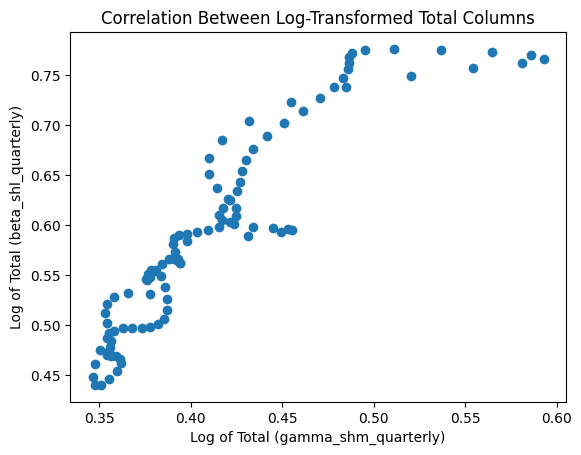

In [50]:
plt.scatter(
    merged_df_corr_levels['log_Total_gamma'], 
    merged_df_corr_levels['log_Total_beta']
)
plt.xlabel('Log of Total (gamma_shm_quarterly)')
plt.ylabel('Log of Total (beta_shl_quarterly)')
plt.title('Correlation Between Log-Transformed Total Columns')
plt.show()


In [51]:
real_gdp.index = beta_shl_quarterly.index

Correlation between the real GDP of portugal and the 2 markups

In [52]:
merged_df_rgdp_gamma = pd.merge(
    gamma_shm_quarterly,
    real_gdp,
    left_index=True,
    right_index=True,
    how='inner',  # Only include years present in both DataFrames
    suffixes=('', '_real_gdp')  # To handle any column name conflicts
)

real_gdp_column_name = real_gdp.columns[0]

# Compute the natural logarithm of the columns
merged_df_rgdp_gamma['log_Total'] = np.log(merged_df_rgdp_gamma['Total'])
merged_df_rgdp_gamma['log_real_gdp'] = np.log(merged_df_rgdp_gamma[real_gdp_column_name])

corr_coef_log, p_value_log = pearsonr(
    merged_df_rgdp_gamma['log_Total'],
    merged_df_rgdp_gamma['log_real_gdp']
)
print('Correlation coefficient (with log transformation):', corr_coef_log)
print('P-value:', p_value_log)


Correlation coefficient (with log transformation): 0.3262986727221311
P-value: 0.0007237822797384894


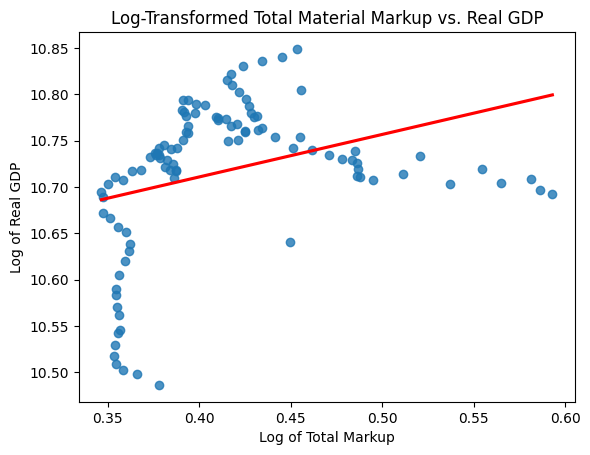

In [53]:
sns.regplot(
    x='log_Total',
    y='log_real_gdp',
    data=merged_df_rgdp_gamma,
    ci=None,
    line_kws={'color': 'red'}
)
plt.xlabel('Log of Total Markup')
plt.ylabel('Log of Real GDP')
plt.title('Log-Transformed Total Material Markup vs. Real GDP')
plt.show()

In [54]:
merged_df_rgdp_beta = pd.merge(
    beta_shl_quarterly,
    real_gdp,
    left_index=True,
    right_index=True,
    how='inner',  # Only include years present in both DataFrames
    suffixes=('', '_real_gdp')  # To handle any column name conflicts
)

real_gdp_column_name = real_gdp.columns[0]

# Compute the natural logarithm of the columns
merged_df_rgdp_beta['log_Total'] = np.log(merged_df_rgdp_beta['Total'])
merged_df_rgdp_beta['log_real_gdp'] = np.log(merged_df_rgdp_beta[real_gdp_column_name])

corr_coef_log, p_value_log = pearsonr(
    merged_df_rgdp_beta['log_Total'],
    merged_df_rgdp_beta['log_real_gdp']
)
print('Correlation coefficient (with log transformation):', corr_coef_log)
print('P-value:', p_value_log)

Correlation coefficient (with log transformation): 0.3924619615744718
P-value: 3.7795883320494054e-05


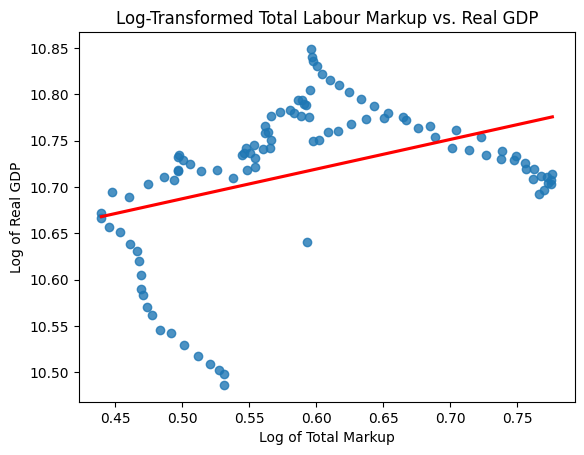

In [55]:
sns.regplot(
    x='log_Total',
    y='log_real_gdp',
    data=merged_df_rgdp_beta,
    ci=None,
    line_kws={'color': 'red'}
)
plt.xlabel('Log of Total Markup')
plt.ylabel('Log of Real GDP')
plt.title('Log-Transformed Total Labour Markup vs. Real GDP')
plt.show()

Correlation between the delta logs of the markups and the markups with the real GDP

Correlation coefficient (delta log): 0.39690257695296605
P-value: 3.313282452166271e-05


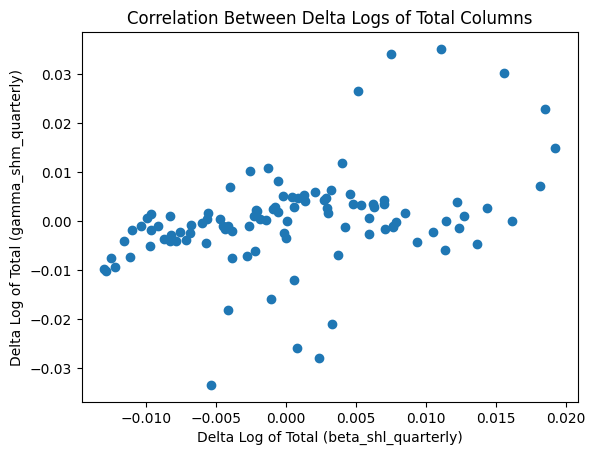

In [56]:
# 1. Create copies of the 'Total' columns
beta_total = beta_shl_quarterly['Total'].copy()
gamma_total = gamma_shm_quarterly['Total'].copy()

# 2. Compute the natural logarithm of the columns
log_beta_total = np.log(beta_total)
log_gamma_total = np.log(gamma_total)

# 3. Calculate the delta logs (first differences)
delta_log_beta_total = log_beta_total.diff()
delta_log_gamma_total = log_gamma_total.diff()

# 4. Combine the delta logs into a new DataFrame
delta_logs_df_total = pd.DataFrame({
    'delta_log_beta_total': delta_log_beta_total,
    'delta_log_gamma_total': delta_log_gamma_total
})

# 5. Drop NaN values resulting from differencing
delta_logs_df_total.dropna(inplace=True)

# 6. Compute the correlation coefficient between delta logs
corr_coef_total, p_value_total = pearsonr(
    delta_logs_df_total['delta_log_beta_total'],
    delta_logs_df_total['delta_log_gamma_total']
)
print('Correlation coefficient (delta log):', corr_coef_total)
print('P-value:', p_value_total)

# 7. Visualize the relationship (optional)
plt.scatter(
    delta_logs_df_total['delta_log_beta_total'],
    delta_logs_df_total['delta_log_gamma_total']
)
plt.xlabel('Delta Log of Total (beta_shl_quarterly)')
plt.ylabel('Delta Log of Total (gamma_shm_quarterly)')
plt.title('Correlation Between Delta Logs of Total Columns')
plt.show()

Correlation coefficient (delta log without outliers): -0.2618286006565376
P-value: 0.01217406588484025


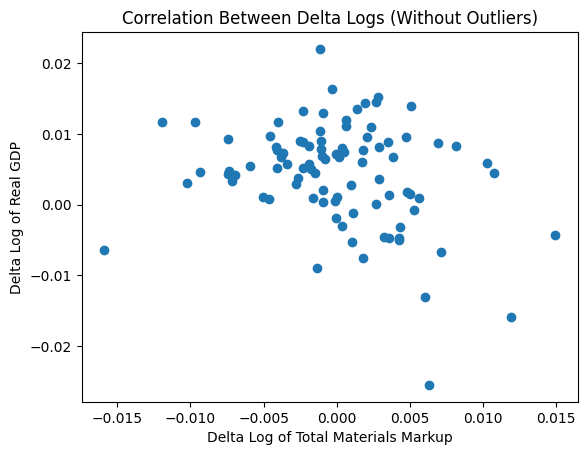

In [57]:
# 1. Create copies of the relevant data
real_gdp_column_name = real_gdp.columns[0]
real_gdp_data = real_gdp[real_gdp_column_name].copy()

# 2. Compute the natural logarithm of the columns
log_real_gdp = np.log(real_gdp_data)

# 3. Calculate the delta logs (first differences)
delta_log_gamma_total = log_gamma_total.diff()
delta_log_real_gdp = log_real_gdp.diff()

# 4. Combine the delta logs into a new DataFrame
delta_logs_df = pd.DataFrame({
    'delta_log_gamma_total': delta_log_gamma_total,
    'delta_log_real_gdp': delta_log_real_gdp
})

# 5. Drop NaN values resulting from differencing
delta_logs_df.dropna(inplace=True)

# 6. Remove outliers only for the correlation calculation
# Calculate z-scores to identify outliers
z_scores = np.abs((delta_logs_df - delta_logs_df.mean()) / delta_logs_df.std())

# Create a new DataFrame without outliers (this will only be used for correlation and plotting)
delta_logs_df_no_outliers = delta_logs_df[(z_scores < 2).all(axis=1)]

# 7. Compute the correlation coefficient between delta logs (without outliers)
corr_coef_delta_log, p_value_delta_log = pearsonr(
    delta_logs_df_no_outliers['delta_log_gamma_total'],
    delta_logs_df_no_outliers['delta_log_real_gdp']
)
print('Correlation coefficient (delta log without outliers):', corr_coef_delta_log)
print('P-value:', p_value_delta_log)

# 8. Plot the data without outliers
plt.scatter(
    delta_logs_df_no_outliers['delta_log_gamma_total'],
    delta_logs_df_no_outliers['delta_log_real_gdp']
)
plt.xlabel('Delta Log of Total Materials Markup')
plt.ylabel('Delta Log of Real GDP')
plt.title('Correlation Between Delta Logs (Without Outliers)')
plt.show()


Correlation coefficient (delta log without outliers): -0.3614535721481586
P-value: 0.00027524613115823254


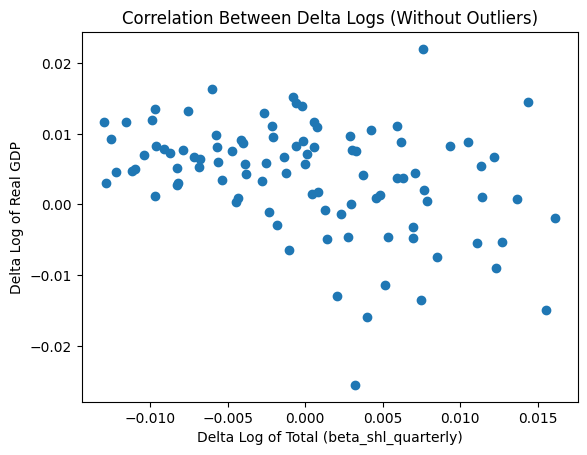

In [58]:
# 4. Combine the delta logs into a new DataFrame
delta_logs_df_beta = pd.DataFrame({
    'delta_log_beta_total': delta_log_beta_total,
    'delta_log_real_gdp': delta_log_real_gdp
})

# 5. Drop NaN values resulting from differencing
delta_logs_df_beta.dropna(inplace=True)

# 6. Remove outliers only for the correlation calculation
# Calculate z-scores to identify outliers
z_scores_beta = np.abs((delta_logs_df_beta - delta_logs_df_beta.mean()) / delta_logs_df_beta.std())

# Create a new DataFrame without outliers (this will only be used for correlation and plotting)
delta_logs_df_beta_no_outliers = delta_logs_df_beta[(z_scores_beta < 2).all(axis=1)]

# 7. Compute the correlation coefficient between delta logs (without outliers)
corr_coef_delta_log_beta, p_value_delta_log_beta = pearsonr(
    delta_logs_df_beta_no_outliers['delta_log_beta_total'],
    delta_logs_df_beta_no_outliers['delta_log_real_gdp']
)
print('Correlation coefficient (delta log without outliers):', corr_coef_delta_log_beta)
print('P-value:', p_value_delta_log_beta)

# 8. Plot the data without outliers
plt.scatter(
    delta_logs_df_beta_no_outliers['delta_log_beta_total'],
    delta_logs_df_beta_no_outliers['delta_log_real_gdp']
)
plt.xlabel('Delta Log of Total (beta_shl_quarterly)')
plt.ylabel('Delta Log of Real GDP')
plt.title('Correlation Between Delta Logs (Without Outliers)')
plt.show()

Calculating the aggregate markup by fixing the initial weights and letting the markup values float

In [59]:
fixed_weights = weights_quarterly.drop(columns='Total').iloc[0]

# Step 2: Select markup columns (excluding 'Total')
markup_columns = gamma_shm_quarterly.columns.drop('Total')

# Step 3: Multiply markups by fixed weights
weighted_markups_fixed = gamma_shm_quarterly[markup_columns].multiply(fixed_weights, axis=1)

# Step 4: Compute the new 'Total' column
gamma_shm_quarterly['Total_fixed_weights'] = weighted_markups_fixed.sum(axis=1)

gamma_shm_quarterly['Total_fixed_weights']

1995-03-31    1.458989
1995-06-30    1.443348
1995-09-30    1.434020
1995-12-31    1.429703
1996-03-31    1.428879
                ...   
2019-12-31    1.459733
2020-03-31    1.457145
2020-06-30    1.448806
2020-09-30    1.432685
2020-12-31    1.406970
Freq: QE-DEC, Name: Total_fixed_weights, Length: 104, dtype: float64

In [61]:
# Step 2: Select markup columns (excluding 'Total')
markup_columns_beta = beta_shl_quarterly.columns.drop('Total')

# Step 3: Multiply markups by fixed weights
weighted_markups_fixed = beta_shl_quarterly[markup_columns_beta].multiply(fixed_weights, axis=1)

# Step 4: Compute the new 'Total' column
beta_shl_quarterly['Total_fixed_weights'] = weighted_markups_fixed.sum(axis=1)

beta_shl_quarterly['Total_fixed_weights']

1995-03-31    1.700791
1995-06-30    1.700883
1995-09-30    1.697903
1995-12-31    1.692555
1996-03-31    1.685645
                ...   
2019-12-31    1.599021
2020-03-31    1.589119
2020-06-30    1.590194
2020-09-30    1.606043
2020-12-31    1.640371
Freq: QE-DEC, Name: Total_fixed_weights, Length: 104, dtype: float64

Calculating the aggregate markup by fixing the initial markups and letting the weight values float

In [62]:
# Step 1: Define markup_columns_gamma using weights_quarterly to ensure alignment
markup_columns_gamma = weights_quarterly.columns.drop('Total')

# Step 2: Extract fixed markups from the first period
fixed_markups_gamma = gamma_shm_quarterly.loc[gamma_shm_quarterly.index[0], markup_columns_gamma]

# Step 3: Multiply varying weights by fixed markups
weighted_markups_fixed_markups_gamma = weights_quarterly[markup_columns_gamma].multiply(fixed_markups_gamma, axis=1)

# Step 4: Compute the new 'Total_fixed_markups' column
gamma_shm_quarterly['Total_fixed_markups'] = weighted_markups_fixed_markups_gamma.sum(axis=1)

gamma_shm_quarterly['Total_fixed_markups']

1995-03-31    1.458989
1995-06-30    1.457259
1995-09-30    1.455759
1995-12-31    1.454569
1996-03-31    1.453759
                ...   
2019-12-31    1.522754
2020-03-31    1.528434
2020-06-30    1.527705
2020-09-30    1.518101
2020-12-31    1.497204
Freq: QE-DEC, Name: Total_fixed_markups, Length: 104, dtype: float64

In [63]:
# Step 1: Define markup_columns_beta using weights_quarterly to ensure alignment
markup_columns_beta = weights_quarterly.columns.drop('Total')

# Step 2: Extract fixed markups from the first period
fixed_markups_beta = beta_shl_quarterly.loc[beta_shl_quarterly.index[0], markup_columns_beta]

# Step 3: Multiply varying weights by fixed markups
weighted_markups_fixed_markups_beta = weights_quarterly[markup_columns_beta].multiply(fixed_markups_beta, axis=1)

# Step 4: Compute the new 'Total_fixed_markups' column
beta_shl_quarterly['Total_fixed_markups'] = weighted_markups_fixed_markups_beta.sum(axis=1)

beta_shl_quarterly['Total_fixed_markups']

1995-03-31    1.700791
1995-06-30    1.701686
1995-09-30    1.698233
1995-12-31    1.691604
1996-03-31    1.683108
                ...   
2019-12-31    1.888951
2020-03-31    1.896197
2020-06-30    1.894383
2020-09-30    1.880224
2020-12-31    1.850531
Freq: QE-DEC, Name: Total_fixed_markups, Length: 104, dtype: float64

Decomposition Analysis

In [64]:
gamma_shm_quarterly

,"Agriculture, forestry and fishing","Industry, energy, water supply and sewerage",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities",Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities",Public administration and defence; compulsory social security; education; human health and social work activities,Arts; entertainment; repair of household goods and other services,Total,Total_excluding_Public_admin,Total_fixed_weights,Total_fixed_markups
1995-03-31,3.007613,1.064784,1.171849,0.987441,1.181477,5.425798,2.344659,1.300753,1.819393,0.724972,1.458989,1.242286,1.458989,1.458989
1995-06-30,2.965684,1.069201,1.168474,0.976443,1.177573,5.197500,2.268233,1.291083,1.816088,0.730885,1.441702,1.225345,1.443348,1.457259
1995-09-30,2.918824,1.072220,1.165460,0.973490,1.177155,5.079498,2.206376,1.284571,1.815012,0.737898,1.430984,1.214999,1.434020,1.455759
1995-12-31,2.870581,1.074111,1.162855,0.976521,1.179067,5.042680,2.158689,1.280846,1.816521,0.745359,1.425568,1.209847,1.429703,1.454569
1996-03-31,2.824564,1.075193,1.160688,0.983217,1.182050,5.054412,2.124160,1.279416,1.820854,0.752598,1.424061,1.208371,1.428879,1.453759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,2.085104,1.052303,1.287776,0.992500,1.420707,3.668737,3.855041,1.608891,1.772772,0.978521,1.573311,1.324728,1.459733,1.522754
2020-03-31,2.062106,1.052969,1.283219,0.985031,1.419842,3.655444,3.860705,1.620520,1.770096,0.980569,1.577147,1.326040,1.457145,1.528434
2020-06-30,2.037554,1.049100,1.274299,0.978187,1.412102,3.645609,3.831588,1.620606,1.756133,0.976519,1.567436,1.317977,1.448806,1.527705
2020-09-30,2.012828,1.039089,1.259476,0.972401,1.395929,3.643879,3.748770,1.604747,1.727276,0.964057,1.539242,1.297040,1.432685,1.518101


Gamma Decomposition Verification (without outliers):
             Delta_Total  Sum_of_Effects  Check
1995-03-31 -4.440892e-16   -4.440892e-16    0.0
1995-06-30 -1.728733e-02   -1.728733e-02    0.0
1995-09-30 -2.800551e-02   -2.800551e-02    0.0
1995-12-31 -3.342123e-02   -3.342123e-02    0.0
1996-03-31 -3.492847e-02   -3.492847e-02    0.0
...                  ...             ...    ...
2019-12-31  1.143216e-01    1.143216e-01    0.0
2020-03-31  1.181580e-01    1.181580e-01    0.0
2020-06-30  1.084468e-01    1.084468e-01    0.0
2020-09-30  8.025245e-02    8.025245e-02    0.0
2020-12-31  2.968967e-02    2.968967e-02    0.0

[98 rows x 3 columns]


C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\3493258276.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamma_decomposition_no_outliers['Sum_of_Effects'] = (
C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\3493258276.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamma_decomposition_no_outliers['Check'] = gamma_decomposition_no_outliers['Delta_Total'] - gamma_decomposition_no_outliers['Sum_of_Effects']
C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\3493258276.py:66: SettingWithCopyWarni

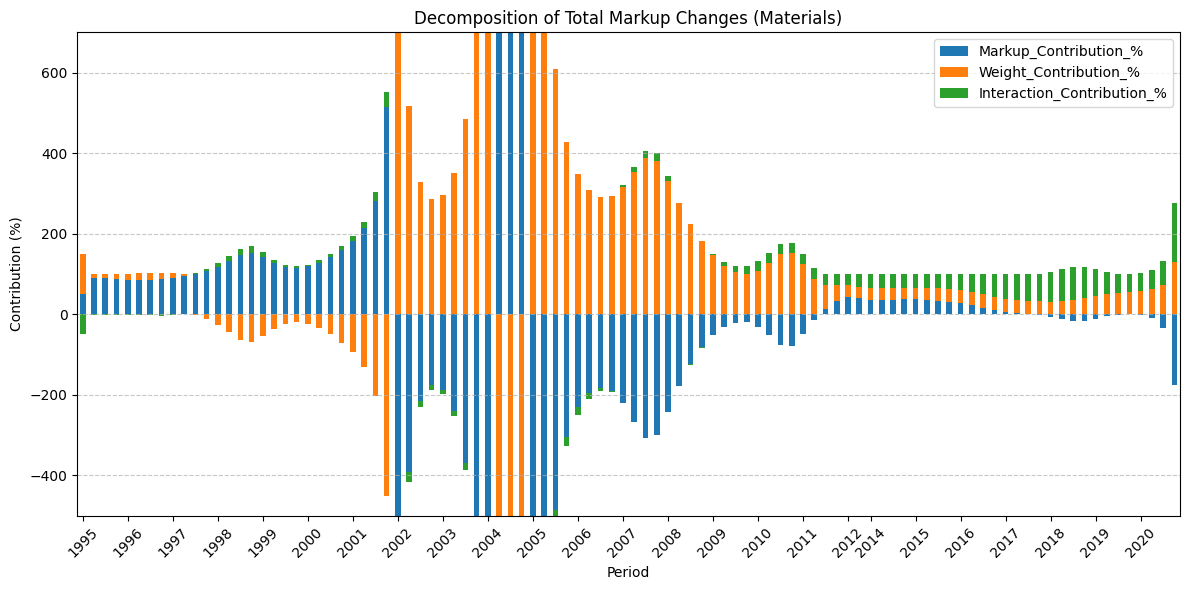

In [65]:
# 1. Define the Base Period
base_period_gamma = gamma_shm_quarterly.index[0]

gamma_product_columns = gamma_shm_quarterly.columns.drop(
    ['Total', 'Total_fixed_weights', 'Total_fixed_markups', 'Total_base_weights', 'Total_base_markups','Total_excluding_Public_admin'],
    errors='ignore'
)

# Calculate the total markup in the base period
gamma_total_base = (weights_quarterly.loc[base_period_gamma, gamma_product_columns] *
                    gamma_shm_quarterly.loc[base_period_gamma, gamma_product_columns]).sum()

# a. Total with Base Weights and Variable Markups (already stored in 'Total_fixed_weights')
gamma_total_fixed_weights = gamma_shm_quarterly['Total_fixed_weights']

# b. Total with Variable Weights and Base Markups (already stored in 'Total_fixed_markups')
gamma_total_fixed_markups = gamma_shm_quarterly['Total_fixed_markups']

# 4. Compute Changes and Effects

# Actual total markup over time (variable weights and markups)
gamma_total_actual = gamma_shm_quarterly['Total']

# Change in total markup from base period
gamma_delta_total = gamma_total_actual - gamma_total_base

# Markup Effect (using 'Total_fixed_weights' calculated earlier)
gamma_markup_effect = gamma_total_fixed_weights - gamma_total_base

# Weight Effect (using 'Total_fixed_markups' calculated earlier)
gamma_weight_effect = gamma_total_fixed_markups - gamma_total_base

# Interaction Effect
gamma_interaction_effect = gamma_delta_total - gamma_markup_effect - gamma_weight_effect

# 5. Create DataFrame to Store the Results

gamma_decomposition = pd.DataFrame({
    'Total_Actual': gamma_total_actual,
    'Total_Base': gamma_total_base,
    'Delta_Total': gamma_delta_total,
    'Markup_Effect': gamma_markup_effect,
    'Weight_Effect': gamma_weight_effect,
    'Interaction_Effect': gamma_interaction_effect
}, index=gamma_shm_quarterly.index)

# Remove outliers only for the decomposition analysis and visualization
z_scores = np.abs((gamma_decomposition - gamma_decomposition.mean()) / gamma_decomposition.std())
gamma_decomposition_no_outliers = gamma_decomposition[(z_scores < 2).all(axis=1)]

# 6. Verify the Decomposition

gamma_decomposition_no_outliers['Sum_of_Effects'] = (
    gamma_decomposition_no_outliers['Markup_Effect'] +
    gamma_decomposition_no_outliers['Weight_Effect'] +
    gamma_decomposition_no_outliers['Interaction_Effect']
)
gamma_decomposition_no_outliers['Check'] = gamma_decomposition_no_outliers['Delta_Total'] - gamma_decomposition_no_outliers['Sum_of_Effects']

# Display to verify the 'Check' column is close to zero
print('Gamma Decomposition Verification (without outliers):')
print(gamma_decomposition_no_outliers[['Delta_Total', 'Sum_of_Effects', 'Check']])

# 7. Calculate Percentage Contributions

gamma_decomposition_no_outliers['Markup_Contribution_%'] = (gamma_decomposition_no_outliers['Markup_Effect'] / gamma_decomposition_no_outliers['Delta_Total']) * 100
gamma_decomposition_no_outliers['Weight_Contribution_%'] = (gamma_decomposition_no_outliers['Weight_Effect'] / gamma_decomposition_no_outliers['Delta_Total']) * 100
gamma_decomposition_no_outliers['Interaction_Contribution_%'] = (gamma_decomposition_no_outliers['Interaction_Effect'] / gamma_decomposition_no_outliers['Delta_Total']) * 100

# Handle division by zero and NaN
gamma_decomposition_no_outliers.replace([np.inf, -np.inf], np.nan, inplace=True)
gamma_decomposition_no_outliers.fillna(0, inplace=True)

# Plot the data without outliers
ax = gamma_decomposition_no_outliers[['Markup_Contribution_%', 'Weight_Contribution_%', 'Interaction_Contribution_%']].plot(
    kind='bar', stacked=True, figsize=(12, 6)
)

plt.title('Decomposition of Total Markup Changes (Materials)')
plt.xlabel('Period')
plt.ylabel('Contribution (%)')
plt.legend(loc='best')

# Apply ylim after plotting
plt.ylim(-500, 700)

# Adjust the x-axis to show only years
ticks = [i for i in range(len(gamma_decomposition_no_outliers.index)) if gamma_decomposition_no_outliers.index[i].quarter == 1]

ax.set_xticks(ticks)
ax.set_xticklabels(gamma_decomposition_no_outliers.index[ticks].year, rotation=45)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\584060512.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_decomposition_no_outliers['Sum_of_Effects'] = (
C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\584060512.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_decomposition_no_outliers['Check'] = beta_decomposition_no_outliers['Delta_Total'] - beta_decomposition_no_outliers['Sum_of_Effects']
C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\584060512.py:71: SettingWithCopyWarning: 
A 

Beta Decomposition Verification (without outliers):
            Delta_Total  Sum_of_Effects  Check
1995-03-31     0.000000        0.000000    0.0
1995-06-30     0.001015        0.001015    0.0
1995-09-30    -0.005505       -0.005505    0.0
1995-12-31    -0.017596       -0.017596    0.0
1996-03-31    -0.032853       -0.032853    0.0
...                 ...             ...    ...
2019-06-30     0.117646        0.117646    0.0
2019-09-30     0.115373        0.115373    0.0
2019-12-31     0.114304        0.114304    0.0
2020-09-30     0.101083        0.101083    0.0
2020-12-31     0.091460        0.091460    0.0

[92 rows x 3 columns]


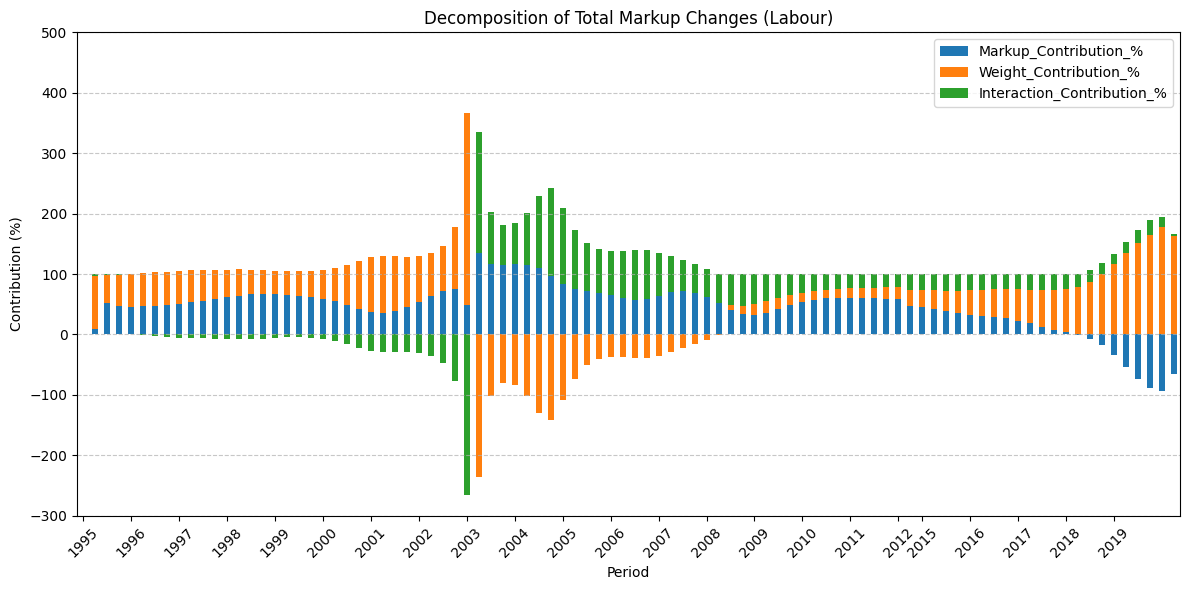

In [66]:
# 1. Define the Base Period
base_period_beta = beta_shl_quarterly.index[0]

beta_product_columns = beta_shl_quarterly.columns.drop(
    ['Total', 'Total_fixed_weights', 'Total_fixed_markups', 'Total_base_weights', 'Total_base_markups','Total_excluding_Public_admin'],
    errors='ignore'
)

# 2. Extract Base Period Total (No need to recalculate 'Total_fixed_weights' or 'Total_fixed_markups')
# We use the already calculated 'Total_fixed_weights' and 'Total_fixed_markups' columns.

# Calculate the total markup in the base period
beta_total_base = (weights_quarterly.loc[base_period_beta, beta_product_columns] *
                   beta_shl_quarterly.loc[base_period_beta, beta_product_columns]).sum()

# 3. Use Already Calculated Totals

# a. Total with Base Weights and Variable Markups (already stored in 'Total_fixed_weights')
beta_total_fixed_weights = beta_shl_quarterly['Total_fixed_weights']

# b. Total with Variable Weights and Base Markups (already stored in 'Total_fixed_markups')
beta_total_fixed_markups = beta_shl_quarterly['Total_fixed_markups']

# 4. Compute Changes and Effects

# Actual total markup over time (variable weights and markups)
beta_total_actual = beta_shl_quarterly['Total']

# Change in total markup from base period
beta_delta_total = beta_total_actual - beta_total_base

# Markup Effect (using 'Total_fixed_weights' calculated earlier)
beta_markup_effect = beta_total_fixed_weights - beta_total_base

# Weight Effect (using 'Total_fixed_markups' calculated earlier)
beta_weight_effect = beta_total_fixed_markups - beta_total_base

# Interaction Effect
beta_interaction_effect = beta_delta_total - beta_markup_effect - beta_weight_effect

# 5. Create DataFrame to Store the Results

beta_decomposition = pd.DataFrame({
    'Total_Actual': beta_total_actual,
    'Total_Base': beta_total_base,
    'Delta_Total': beta_delta_total,
    'Markup_Effect': beta_markup_effect,
    'Weight_Effect': beta_weight_effect,
    'Interaction_Effect': beta_interaction_effect
}, index=beta_shl_quarterly.index)

# Remove outliers only for the decomposition analysis and visualization
z_scores = np.abs((beta_decomposition - beta_decomposition.mean()) / beta_decomposition.std())
beta_decomposition_no_outliers = beta_decomposition[(z_scores < 2).all(axis=1)]

# 6. Verify the Decomposition

beta_decomposition_no_outliers['Sum_of_Effects'] = (
    beta_decomposition_no_outliers['Markup_Effect'] +
    beta_decomposition_no_outliers['Weight_Effect'] +
    beta_decomposition_no_outliers['Interaction_Effect']
)
beta_decomposition_no_outliers['Check'] = beta_decomposition_no_outliers['Delta_Total'] - beta_decomposition_no_outliers['Sum_of_Effects']

# Display to verify the 'Check' column is close to zero
print('Beta Decomposition Verification (without outliers):')
print(beta_decomposition_no_outliers[['Delta_Total', 'Sum_of_Effects', 'Check']])

# 7. Calculate Percentage Contributions

beta_decomposition_no_outliers['Markup_Contribution_%'] = (beta_decomposition_no_outliers['Markup_Effect'] / beta_decomposition_no_outliers['Delta_Total']) * 100
beta_decomposition_no_outliers['Weight_Contribution_%'] = (beta_decomposition_no_outliers['Weight_Effect'] / beta_decomposition_no_outliers['Delta_Total']) * 100
beta_decomposition_no_outliers['Interaction_Contribution_%'] = (beta_decomposition_no_outliers['Interaction_Effect'] / beta_decomposition_no_outliers['Delta_Total']) * 100

# Handle division by zero and NaN
beta_decomposition_no_outliers.replace([np.inf, -np.inf], np.nan, inplace=True)
beta_decomposition_no_outliers.fillna(0, inplace=True)

# Plot the decomposition results
ax = beta_decomposition_no_outliers[['Markup_Contribution_%', 'Weight_Contribution_%', 'Interaction_Contribution_%']].plot(
    kind='bar', stacked=True, figsize=(12, 6)
)

plt.title('Decomposition of Total Markup Changes (Labour)')
plt.xlabel('Period')
plt.ylabel('Contribution (%)')
plt.legend(loc='best')

# Apply ylim after plotting
plt.ylim(-300, 500)

# Adjust the x-axis to show only years
ticks = [i for i in range(len(beta_decomposition_no_outliers.index)) if beta_decomposition_no_outliers.index[i].quarter == 1]

# Set the x-axis ticks and labels to display only the year at the start of each year
ax.set_xticks(ticks)
ax.set_xticklabels(beta_decomposition_no_outliers.index[ticks].year, rotation=45)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [67]:
beta_decomposition.loc['1999-03-31']

Total_Actual          1.574457
Total_Base            1.700791
Delta_Total          -0.126333
Markup_Effect        -0.084987
Weight_Effect        -0.048571
Interaction_Effect    0.007225
Name: 1999-03-31 00:00:00, dtype: float64

markup de 95 a 

Non conditional ciclicality using real GDP

In [68]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Step 1: Calculate the log difference for gamma_shm_quarterly (markups)
gamma_shm_quarterly['log_diff_markups'] = np.log(gamma_shm_quarterly['Total']).diff()  # Assuming 'Total' is the markup column

# Step 2: Calculate the log difference for real GDP (assuming real_gdp has only one column)
real_gdp['log_diff_real_gdp'] = np.log(real_gdp.iloc[:, 0]).diff()  # Single column in real_gdp

# Step 3: Merge the data based on the index (assuming both have the same time index, e.g., quarterly)
gamma_data = pd.merge(gamma_shm_quarterly[['log_diff_markups']], real_gdp[['log_diff_real_gdp']], left_index=True, right_index=True)

gamma_data = gamma_data.replace([np.inf, -np.inf], np.nan).dropna()

# Step 4: Run the regression for gamma
X_gamma = gamma_data['log_diff_real_gdp']  # Independent variable (Δln(Y_t) - log diff of real GDP)
y_gamma = gamma_data['log_diff_markups']   # Dependent variable (Δln(μ_t) - log diff of markups)

# Add constant (intercept)
X_gamma = sm.add_constant(X_gamma)

# Fit the model
model_gamma = sm.OLS(y_gamma, X_gamma)
results_gamma = model_gamma.fit()

# Step 5: Print the regression results for gamma
print("Regression Results for Gamma:")
print(results_gamma.summary())

Regression Results for Gamma:
                            OLS Regression Results                            
Dep. Variable:       log_diff_markups   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.024
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0475
Time:                        10:10:27   Log-Likelihood:                 330.11
No. Observations:                 103   AIC:                            -656.2
Df Residuals:                     101   BIC:                            -650.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

In [69]:
# Step 1: Calculate the log difference for beta_shl_quarterly (markups)
beta_shl_quarterly['log_diff_markups'] = np.log(beta_shl_quarterly['Total']).diff()  # Assuming 'Total' is the markup column

# Step 2: Calculate the log difference for real GDP
real_gdp['log_diff_real_gdp'] = np.log(real_gdp.iloc[:, 0]).diff()  # Assuming 'Total' is the real GDP column

# Step 3: Merge the data based on the index (assuming both have the same time index, e.g., quarterly)
beta_data = pd.merge(beta_shl_quarterly[['log_diff_markups']], real_gdp[['log_diff_real_gdp']], left_index=True, right_index=True)

beta_data = beta_data.replace([np.inf, -np.inf], np.nan).dropna()

# Step 4: Run the regression for beta
X_beta = beta_data['log_diff_real_gdp']  # Independent variable (Δln(Y_t) - log diff of real GDP)
y_beta = beta_data['log_diff_markups']   # Dependent variable (Δln(μ_t) - log diff of markups)

# Add constant (intercept)
X_beta = sm.add_constant(X_beta)

# Fit the model
model_beta = sm.OLS(y_beta, X_beta)
results_beta = model_beta.fit()

# Step 5: Print the regression results for beta
print("Regression Results for Beta:")
print(results_beta.summary())


Regression Results for Beta:
                            OLS Regression Results                            
Dep. Variable:       log_diff_markups   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.100
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.150
Time:                        10:10:27   Log-Likelihood:                 354.96
No. Observations:                 103   AIC:                            -705.9
Df Residuals:                     101   BIC:                            -700.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const    

# Hirschman-Herfindahl Index

To run the HH Index code, please unzip the scie_baseline file.

In [70]:
hh_data = pd.read_stata("scie_baseline.dta")
hh_data.rename(columns={'ano' : 'Years'}, inplace=True)

hh_data

C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\201511912.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  hh_data = pd.read_stata("scie_baseline.dta")


,Years,npc_fic,cae_cod,revenues_masked
0,2004,500001184,87301,NaN
1,2005,500001184,87301,NaN
2,2006,500001184,87301,NaN
3,2007,500001184,87301,38034.714552
4,2008,500001184,87301,32154.017822
...,...,...,...,...
5976369,2019,504508502,62010,0.000000
5976370,2019,504508503,68100,0.000000
5976371,2019,504508504,62020,372070.234441
5976372,2019,504508505,52230,0.000000


In [71]:
hh_data = hh_data.groupby(['npc_fic', 'cae_cod','Years']).agg({'revenues_masked': 'sum'}).reset_index()

hh_data

,npc_fic,cae_cod,Years,revenues_masked
0,500001184,87301,2004,0.000000
1,500001184,87301,2005,0.000000
2,500001184,87301,2006,0.000000
3,500001184,87301,2007,38034.714552
4,500001184,87301,2008,32154.017822
...,...,...,...,...
5976369,504508502,62010,2019,0.000000
5976370,504508503,68100,2019,0.000000
5976371,504508504,62020,2019,372070.234441
5976372,504508505,52230,2019,0.000000


In [72]:
hh_data['cae_2d'] = hh_data['cae_cod'].astype(str).str[:2]

hh_data['cae_2d'].nunique()

80

In [73]:
mappings = {
    '01': 1, '02': 1, '03': 1, 
    '05': 2, '06': 2, '07': 2, '08': 2, '09': 2,
    '10': 2, '11': 2, '12': 2,
    '13': 2, '14': 2, '15': 2,
    '16': 2, '17': 2, '18': 2,
    '19': 2, 
    '20': 2, 
    '21': 2,
    '22': 2, '23': 2,
    '24': 2, '25': 2,
    '26': 2, 
    '27': 2,
    '28': 2,
    '29': 2, '30': 2,
    '31': 2, '32': 2, '33': 2,
    '35': 2,
    '36': 2, '37': 2, '38': 2, '39': 2,
    '41': 3, '42': 3, '43': 3,
    '45': 4, '46': 4, '47': 4,
    '49': 4, '50': 4, '51': 4, '52': 4, '53': 4,
    '55': 4, '56': 4,
    '58': 5, '59': 5, '60': 5,
    '61': 5,
    '62': 5, '63': 5,
    '64': 6, '65': 6, '66': 6,
    '68': 7,
    '69': 8, '70': 8, '71': 8,
    '72': 8,
    '73': 8, '74': 8, '75': 8,
    '77': 8, '78': 8, '79': 8, '80': 8, '81': 8, '82': 8,
    '84': 9,
    '85': 9,
    '86': 9,
    '87': 9, '88': 9,
    '90': 10, '91': 10, '92': 10, '93': 10,
    '94': 10, '95': 10, '96': 10,
    '97': 10, '98': 10,
    '99': 10
}

hh_data['A10'] = hh_data['cae_2d'].map(mappings)

In [74]:
grouped_dfs = {value: hh_data[hh_data['A10'] == value] for value in hh_data['A10'].unique()}

# Print out the new dataframes
for key, group_df in grouped_dfs.items():
    print(f"DataFrame for {key}:\n{group_df}\n")

DataFrame for 9.0:
           npc_fic cae_cod  Years  revenues_masked cae_2d  A10
0        500001184   87301   2004         0.000000     87  9.0
1        500001184   87301   2005         0.000000     87  9.0
2        500001184   87301   2006         0.000000     87  9.0
3        500001184   87301   2007     38034.714552     87  9.0
4        500001184   87301   2008     32154.017822     87  9.0
...            ...     ...    ...              ...    ...  ...
5976118  504133352   86906   2019         0.000000     86  9.0
5976277  504484050   85591   2019     47606.411502     85  9.0
5976299  504484229   86906   2019         0.000000     86  9.0
5976306  504484283   85320   2019         0.000000     85  9.0
5976364  504508497   85400   2019         0.000000     85  9.0

[372984 rows x 6 columns]

DataFrame for 4.0:
           npc_fic cae_cod  Years  revenues_masked cae_2d  A10
7        500003242   55202   2015      2655.373992     55  4.0
8        500003242   55202   2016      6524.546466  

In [75]:
if any(pd.isna(key) for key in grouped_dfs.keys()):
    nan_key = next(key for key in grouped_dfs.keys() if pd.isna(key))
    grouped_dfs.pop(nan_key, None)

In [76]:
grouped_dfs[8.0][grouped_dfs[8.0]['Years'] == 2004]['revenues_masked'].sum()

17119411691.390524

In [77]:
pd.options.display.float_format = '{:.2f}'.format

totals_per_group = {}
for key, group_df in grouped_dfs.items():
    total_revenues = group_df.groupby('Years')['revenues_masked'].sum().reset_index()
    totals_per_group[key] = total_revenues

# Display the results
for key, total_df in totals_per_group.items():
    print(f"Total revenues_masked for each year in {key}:\n{total_df}\n")

Total revenues_masked for each year in 9.0:
    Years  revenues_masked
0    2004    5634440206.56
1    2005    6061113220.36
2    2006    6881186797.33
3    2007    8339379863.47
4    2008    9360846643.56
5    2009   10717105753.47
6    2010   11525445678.21
7    2011    6414500637.19
8    2012    6242106414.07
9    2013    6320997737.36
10   2014    6563421011.03
11   2015    6903509360.27
12   2016    7225731787.39
13   2017    7653268122.69
14   2018    8256083828.48
15   2019    8993644466.88

Total revenues_masked for each year in 4.0:
    Years  revenues_masked
0    2004  124914374360.63
1    2005  131518389093.31
2    2006  139478083166.43
3    2007  149602272614.38
4    2008  156115642844.46
5    2009  144168017898.65
6    2010  150520619504.48
7    2011  145978618975.83
8    2012  136935686153.39
9    2013  136902195004.43
10   2014  141284654679.66
11   2015  146313176243.81
12   2016  152945515628.15
13   2017  166387054795.02
14   2018  177833460686.89
15   2019  185996844

In [78]:
grouped_dfs = {value: hh_data[hh_data['A10'] == value] for value in hh_data['A10'].unique()}

# Calculate total revenues_masked for each year in each dataframe
totals_per_group = {}
for key, group_df in grouped_dfs.items():
    totals_per_group[key] = group_df.groupby('Years')['revenues_masked'].sum()

# Add the quota column
for key, group_df in grouped_dfs.items():
    group_df = group_df.copy()  # Avoid SettingWithCopyWarning
    group_df['quota'] = group_df['revenues_masked'] / group_df['Years'].map(totals_per_group[key])
    grouped_dfs[key] = group_df

grouped_dfs[8.0][grouped_dfs[8.0]['Years'] == 2004]['quota'].sum()

1.0

In [79]:
unique_npc_fic_per_year = {}

for key, group_df in grouped_dfs.items():
    unique_counts = group_df.groupby('Years')['npc_fic'].nunique()
    unique_npc_fic_per_year[key] = unique_counts

In [80]:
for key, value in unique_npc_fic_per_year.items():
    print(f"Unique npc_fic counts per year for {key}:\n{value}\n")

Unique npc_fic counts per year for 9.0:
Years
2004    16091
2005    17060
2006    18275
2007    19440
2008    20748
2009    21615
2010    22209
2011    23524
2012    23893
2013    24670
2014    25505
2015    26216
2016    26735
2017    27458
2018    28853
2019    30692
Name: npc_fic, dtype: int64

Unique npc_fic counts per year for 4.0:
Years
2004    142859
2005    143623
2006    146808
2007    150829
2008    152073
2009    151160
2010    149115
2011    148305
2012    145541
2013    145253
2014    146835
2015    149116
2016    150489
2017    153438
2018    158279
2019    166303
Name: npc_fic, dtype: int64

Unique npc_fic counts per year for nan:
Series([], Name: npc_fic, dtype: int64)

Unique npc_fic counts per year for 2.0:
Years
2004    43167
2005    43137
2006    43345
2007    43867
2008    43898
2009    43115
2010    41818
2011    41412
2012    40445
2013    40295
2014    40781
2015    41276
2016    41682
2017    42157
2018    42775
2019    43704
Name: npc_fic, dtype: int64

Unique

In [81]:
if any(pd.isna(key) for key in unique_npc_fic_per_year.keys()):
    nan_key = next(key for key in unique_npc_fic_per_year.keys() if pd.isna(key))
    unique_npc_fic_per_year.pop(nan_key, None)

if any(pd.isna(key) for key in grouped_dfs.keys()):
    nan_key = next(key for key in grouped_dfs.keys() if pd.isna(key))
    grouped_dfs.pop(nan_key, None)

In [82]:
mapping = {
    1: 'Agriculture, forestry and fishing',
    2: 'Industry, energy, water supply and sewerage',
    3: 'Construction',
    4: 'Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities',
    5: 'Information and communication',
    6: 'Financial and insurance activities',
    7: 'Real estate activities',
    8: 'Professional, scientific and technical activities; administrative and support service activities',
    9: 'Public administration and defence; compulsory social security; education; human health and social work activities',
    10: 'Arts; entertainment; repair of household goods and other services'
}

# Renaming the keys in the unique_npc_fic_per_year dictionary
unique_npc_fic_per_year = {mapping[key]: value for key, value in unique_npc_fic_per_year.items()}
grouped_dfs = {mapping[key]: value for key, value in grouped_dfs.items()}

for key, value in unique_npc_fic_per_year.items():
    print(f"Unique npc_fic counts per year for {key}:\n{value}\n")


Unique npc_fic counts per year for Public administration and defence; compulsory social security; education; human health and social work activities:
Years
2004    16091
2005    17060
2006    18275
2007    19440
2008    20748
2009    21615
2010    22209
2011    23524
2012    23893
2013    24670
2014    25505
2015    26216
2016    26735
2017    27458
2018    28853
2019    30692
Name: npc_fic, dtype: int64

Unique npc_fic counts per year for Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities:
Years
2004    142859
2005    143623
2006    146808
2007    150829
2008    152073
2009    151160
2010    149115
2011    148305
2012    145541
2013    145253
2014    146835
2015    149116
2016    150489
2017    153438
2018    158279
2019    166303
Name: npc_fic, dtype: int64

Unique npc_fic counts per year for Industry, energy, water supply and sewerage:
Years
2004    43167
2005    43137
2006    43345
2007    4386

In [83]:
hh_indices = {}

for key, group_df in grouped_dfs.items():
    hh_index_per_year = group_df.groupby('Years').apply(
        lambda x: ((x['quota'] ** 2).sum() - 1 / unique_npc_fic_per_year[key][x.name]) / (1 - 1 / unique_npc_fic_per_year[key][x.name])
    )
    hh_indices[key] = hh_index_per_year

for key, hh_index in hh_indices.items():
    print(f"HH Index per year for group {key}:\n{hh_index}\n")

C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\516294929.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hh_index_per_year = group_df.groupby('Years').apply(
C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\516294929.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hh_index_per_year = group_df.groupby('Years').apply(
C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\516294929.py:4: DeprecationWar

HH Index per year for group Public administration and defence; compulsory social security; education; human health and social work activities:
Years
2004   0.00
2005   0.01
2006   0.01
2007   0.01
2008   0.01
2009   0.01
2010   0.01
2011   0.00
2012   0.00
2013   0.00
2014   0.00
2015   0.00
2016   0.00
2017   0.00
2018   0.00
2019   0.00
dtype: float64

HH Index per year for group Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities:
Years
2004   0.00
2005   0.00
2006   0.00
2007   0.00
2008   0.00
2009   0.00
2010   0.00
2011   0.00
2012   0.00
2013   0.00
2014   0.00
2015   0.00
2016   0.00
2017   0.00
2018   0.00
2019   0.00
dtype: float64

HH Index per year for group Industry, energy, water supply and sewerage:
Years
2004   0.01
2005   0.00
2006   0.01
2007   0.01
2008   0.01
2009   0.01
2010   0.01
2011   0.01
2012   0.01
2013   0.01
2014   0.01
2015   0.01
2016   0.01
2017   0.01
2018   0.01
2

C:\Users\Tiago\AppData\Local\Temp\ipykernel_17012\516294929.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hh_index_per_year = group_df.groupby('Years').apply(


In [84]:
hh_index_df = pd.concat(hh_indices, axis=1)

pd.set_option('display.float_format', lambda x: f'{x:.4f}')

hh_index_df

,Public administration and defence; compulsory social security; education; human health and social work activities,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities","Industry, energy, water supply and sewerage",Information and communication,Construction,Arts; entertainment; repair of household goods and other services,"Professional, scientific and technical activities; administrative and support service activities","Agriculture, forestry and fishing",Real estate activities
Years,,,,,,,,,
2004,0.0050,0.0015,0.0108,0.0630,0.0029,0.0168,0.0068,0.0135,0.0124
2005,0.0058,0.0016,0.0049,0.0589,0.0027,0.0132,0.0048,0.0137,0.0064
2006,0.0076,0.0017,0.0144,0.0530,0.0022,0.0147,0.0028,0.0143,0.0062
2007,0.0082,0.0016,0.0124,0.0487,0.0018,0.0149,0.0028,0.0123,0.0053
2008,0.0078,0.0019,0.0149,0.0479,0.0028,0.0130,0.0027,0.0136,0.0063
2009,0.0083,0.0020,0.0106,0.0498,0.0037,0.0111,0.0025,0.0149,0.0043
2010,0.0077,0.0021,0.0121,0.0468,0.0038,0.0303,0.0021,0.0023,0.0024
2011,0.0028,0.0024,0.0110,0.0494,0.0041,0.0078,0.0016,0.0021,0.0031
2012,0.0031,0.0027,0.0135,0.0505,0.0057,0.0071,0.0017,0.0023,0.0029


In [85]:
ic_prod_ratio = annual_data_ic / annual_data_output

ic_prod_ratio.rename(columns={'Wholesale and retail trade, repair of motor vehicles and motorcycles; accommodation and food service activities': 'Retail and Food Services'}, inplace=True)

In [86]:
hh_index_df.reset_index(inplace=True)

hh_index_df['Years'] = pd.to_datetime(hh_index_df['Years'], format='%Y')

ic_prod_ratio.rename(columns={'Wholesale and retail trade, repair of motor vehicles and motorcycles;  accommodation and food service activities': 'Wholesale and retail trade, repair of motor vehicles and motorcycles; accommodation and food service activities'}, inplace=True)
ic_prod_ratio.rename(columns={' Financial, insurance and real estate activities': 'Financial, insurance and real estate activities'}, inplace=True)

hh_index_df= hh_index_df.set_index("Years")

In [87]:
start_year = max(hh_index_df.index.min(), ic_prod_ratio.index.min())
end_year = min(hh_index_df.index.max(), ic_prod_ratio.index.max())

hh_index_df_filtered = hh_index_df[(hh_index_df.index >= start_year) & (hh_index_df.index <= end_year)]
ic_prod_ratio_filtered = ic_prod_ratio[(ic_prod_ratio.index >= start_year) & (ic_prod_ratio.index <= end_year)]

merged_df = hh_index_df_filtered.merge(ic_prod_ratio_filtered, left_index=True, right_index=True, suffixes=('_hh', '_ic'))

columns = [
    'Agriculture, forestry and fishing',
    'Industry, energy, water supply and sewerage',
    'Construction',
    'Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities',
    'Information and communication',
    'Financial and insurance activities',
    'Real estate activities',
    'Professional, scientific and technical activities; administrative and support service activities',
    'Public administration and defence; compulsory social security; education; human health and social work activities',
    'Arts; entertainment; repair of household goods and other services'
]

correlation_dict = {}

for column in columns:
    col_hh = f'{column}_hh'
    col_ic = f'{column}_ic'
    
    if col_hh in merged_df.columns and col_ic in merged_df.columns:
        # Calculate the correlation
        correlation = merged_df[col_hh].corr(1/merged_df[col_ic])
        
        print(f"Correlation between the '{column}' columns: {correlation}")
        
        correlation_dict[column] = correlation
    else:
        print(f"Column '{column}' not found in one or both dataframes.")

Correlation between the 'Agriculture, forestry and fishing' columns: 0.6948803851516233
Correlation between the 'Industry, energy, water supply and sewerage' columns: -0.47768027057405205
Correlation between the 'Construction' columns: 0.20193982646477668
Correlation between the 'Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities' columns: 0.8641484520839879
Correlation between the 'Information and communication' columns: -0.2591369582707366
Column 'Financial and insurance activities' not found in one or both dataframes.
Correlation between the 'Real estate activities' columns: -0.5707534272544108
Correlation between the 'Professional, scientific and technical activities; administrative and support service activities' columns: -0.7642092352578355
Correlation between the 'Public administration and defence; compulsory social security; education; human health and social work activities' columns: 0.491

In [88]:
# Convert the correlation_dict into a DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Correlation'])

# Reset index to turn the sector names into a column
correlation_df = correlation_df.reset_index().rename(columns={'index': 'Sector'})

# Display the DataFrame
correlation_df

,Sector,Correlation
0,"Agriculture, forestry and fishing",0.6949
1,"Industry, energy, water supply and sewerage",-0.4777
2,Construction,0.2019
3,"Wholesale and retail trade, repair of motor ve...",0.8641
4,Information and communication,-0.2591
5,Real estate activities,-0.5708
6,"Professional, scientific and technical activit...",-0.7642
7,Public administration and defence; compulsory ...,0.4915
8,Arts; entertainment; repair of household goods...,-0.5658


In [89]:
merged_df = merged_df.reindex(sorted(merged_df.columns), axis=1)

merged_df

,"Agriculture, forestry and fishing_hh","Agriculture, forestry and fishing_ic",Arts; entertainment; repair of household goods and other services_hh,Arts; entertainment; repair of household goods and other services_ic,Construction_hh,Construction_ic,Financial and insurance activities,"Industry, energy, water supply and sewerage_hh","Industry, energy, water supply and sewerage_ic",Information and communication_hh,Information and communication_ic,"Professional, scientific and technical activities; administrative and support service activities_hh","Professional, scientific and technical activities; administrative and support service activities_ic",Public administration and defence; compulsory social security; education; human health and social work activities_hh,Public administration and defence; compulsory social security; education; human health and social work activities_ic,Real estate activities_hh,Real estate activities_ic,Total,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities_hh","Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities_ic"
Years,,,,,,,,,,,,,,,,,,,,
2004-01-01,0.0135,0.4671,0.0168,0.4397,0.0029,0.7105,0.3468,0.0108,0.7044,0.0630,0.5753,0.0068,0.5011,0.0050,0.2505,0.0124,0.2444,NaN,0.0015,0.4890
2005-01-01,0.0137,0.4895,0.0132,0.4392,0.0027,0.7190,0.3603,0.0049,0.7152,0.0589,0.5708,0.0048,0.4959,0.0058,0.2503,0.0064,0.2317,NaN,0.0016,0.4919
2006-01-01,0.0143,0.4862,0.0147,0.4347,0.0022,0.7099,0.3485,0.0144,0.7193,0.0530,0.5604,0.0028,0.4900,0.0076,0.2576,0.0062,0.2300,NaN,0.0017,0.4899
2007-01-01,0.0123,0.5332,0.0149,0.4395,0.0018,0.6929,0.3548,0.0124,0.7241,0.0487,0.5574,0.0028,0.4817,0.0082,0.2705,0.0053,0.1922,NaN,0.0016,0.4927
2008-01-01,0.0136,0.5490,0.0130,0.4362,0.0028,0.6873,0.3410,0.0149,0.7436,0.0479,0.5693,0.0027,0.4783,0.0078,0.2791,0.0063,0.1904,NaN,0.0019,0.5001
2009-01-01,0.0149,0.5331,0.0111,0.4258,0.0037,0.6848,0.3759,0.0106,0.7092,0.0498,0.5638,0.0025,0.4761,0.0083,0.2861,0.0043,0.1784,NaN,0.0020,0.4725
2010-01-01,0.0023,0.5412,0.0303,0.4137,0.0038,0.6959,0.3946,0.0121,0.7175,0.0468,0.5780,0.0021,0.4735,0.0077,0.2850,0.0024,0.1381,NaN,0.0021,0.4812
2011-01-01,0.0021,0.5829,0.0078,0.3969,0.0041,0.6877,0.3857,0.0110,0.7430,0.0494,0.5489,0.0016,0.4777,0.0028,0.3016,0.0031,0.1422,NaN,0.0024,0.4706
2012-01-01,0.0023,0.5897,0.0071,0.3890,0.0057,0.6547,0.4292,0.0135,0.7469,0.0505,0.5534,0.0017,0.4746,0.0031,0.3083,0.0029,0.0916,NaN,0.0027,0.4525


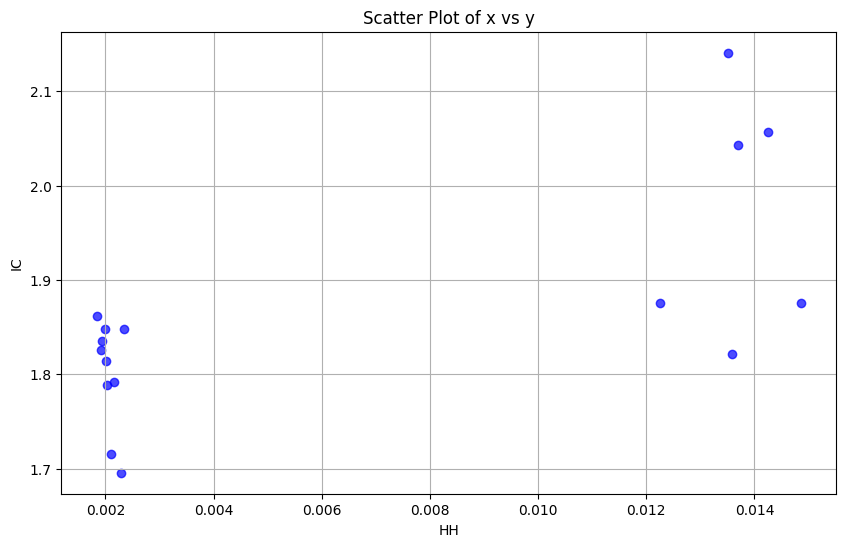

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Agriculture, forestry and fishing_hh'], 1/ merged_df['Agriculture, forestry and fishing_ic'], color='blue', alpha=0.7)
plt.title('Scatter Plot of x vs y')
plt.xlabel('HH')
plt.ylabel('IC')
plt.grid(True)
plt.show()

In [91]:
merged_df.drop('Financial and insurance activities', axis=1, inplace=True)
merged_df.drop('Total', axis=1, inplace=True)

In [92]:
merged_df

,"Agriculture, forestry and fishing_hh","Agriculture, forestry and fishing_ic",Arts; entertainment; repair of household goods and other services_hh,Arts; entertainment; repair of household goods and other services_ic,Construction_hh,Construction_ic,"Industry, energy, water supply and sewerage_hh","Industry, energy, water supply and sewerage_ic",Information and communication_hh,Information and communication_ic,"Professional, scientific and technical activities; administrative and support service activities_hh","Professional, scientific and technical activities; administrative and support service activities_ic",Public administration and defence; compulsory social security; education; human health and social work activities_hh,Public administration and defence; compulsory social security; education; human health and social work activities_ic,Real estate activities_hh,Real estate activities_ic,"Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities_hh","Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities_ic"
Years,,,,,,,,,,,,,,,,,,
2004-01-01,0.0135,0.4671,0.0168,0.4397,0.0029,0.7105,0.0108,0.7044,0.0630,0.5753,0.0068,0.5011,0.0050,0.2505,0.0124,0.2444,0.0015,0.4890
2005-01-01,0.0137,0.4895,0.0132,0.4392,0.0027,0.7190,0.0049,0.7152,0.0589,0.5708,0.0048,0.4959,0.0058,0.2503,0.0064,0.2317,0.0016,0.4919
2006-01-01,0.0143,0.4862,0.0147,0.4347,0.0022,0.7099,0.0144,0.7193,0.0530,0.5604,0.0028,0.4900,0.0076,0.2576,0.0062,0.2300,0.0017,0.4899
2007-01-01,0.0123,0.5332,0.0149,0.4395,0.0018,0.6929,0.0124,0.7241,0.0487,0.5574,0.0028,0.4817,0.0082,0.2705,0.0053,0.1922,0.0016,0.4927
2008-01-01,0.0136,0.5490,0.0130,0.4362,0.0028,0.6873,0.0149,0.7436,0.0479,0.5693,0.0027,0.4783,0.0078,0.2791,0.0063,0.1904,0.0019,0.5001
2009-01-01,0.0149,0.5331,0.0111,0.4258,0.0037,0.6848,0.0106,0.7092,0.0498,0.5638,0.0025,0.4761,0.0083,0.2861,0.0043,0.1784,0.0020,0.4725
2010-01-01,0.0023,0.5412,0.0303,0.4137,0.0038,0.6959,0.0121,0.7175,0.0468,0.5780,0.0021,0.4735,0.0077,0.2850,0.0024,0.1381,0.0021,0.4812
2011-01-01,0.0021,0.5829,0.0078,0.3969,0.0041,0.6877,0.0110,0.7430,0.0494,0.5489,0.0016,0.4777,0.0028,0.3016,0.0031,0.1422,0.0024,0.4706
2012-01-01,0.0023,0.5897,0.0071,0.3890,0.0057,0.6547,0.0135,0.7469,0.0505,0.5534,0.0017,0.4746,0.0031,0.3083,0.0029,0.0916,0.0027,0.4525


In [93]:
# Melt the DataFrame to long format
df_melted = pd.melt(merged_df.reset_index(), id_vars=[merged_df.index.name], var_name="Category", value_name="Value")

# Rename the index column to 'Years'
df_melted.rename(columns={merged_df.index.name: 'Years'}, inplace=True)

# Create dummy variables for each category
df_melted["Sector"] = df_melted["Category"].apply(lambda x: x.rsplit('_', 1)[0])
df_melted["Type"] = df_melted["Category"].apply(lambda x: x.rsplit('_', 1)[1])
df_melted.drop("Category", axis=1, inplace=True)

# Separate HH and IC values
df_hh = df_melted[df_melted["Type"] == "hh"].drop("Type", axis=1).rename(columns={"Value": "HH"})
df_ic = df_melted[df_melted["Type"] == "ic"].drop("Type", axis=1).rename(columns={"Value": "IC"})
df_ic["1/IC"] = 1 / df_ic["IC"]
df_ic.drop("IC", axis=1, inplace=True)

# Merge HH and 1/IC values
df_merged = pd.merge(df_hh, df_ic, on=["Years", "Sector"])

df_dummies = pd.get_dummies(df_merged, columns=["Sector"])

# Display the final merged dataframe
df_dummies.columns


Index(['Years', 'HH', '1/IC', 'Sector_Agriculture, forestry and fishing',
       'Sector_Arts; entertainment; repair of household goods and other services',
       'Sector_Construction',
       'Sector_Industry, energy, water supply and sewerage',
       'Sector_Information and communication',
       'Sector_Professional, scientific and technical activities; administrative and support service activities',
       'Sector_Public administration and defence; compulsory social security; education; human health and social work activities',
       'Sector_Real estate activities',
       'Sector_Wholesale and retail trade, repair of motor vehicles and motorcycles; transportation and storage; accommodation and food service activities'],
      dtype='object')

In [94]:
df_dummies = df_dummies.rename(columns={'1/IC': 'IC_inv'})

df_dummies.columns = df_dummies.columns.str.replace(' ', '_').str.replace('[,;]', '', regex=True)

# Creating the formula for the regression
independent_vars = ['IC_inv'] + [col for col in df_dummies.columns if col.startswith('Sector_')]
formula = 'HH ~ ' + ' + '.join(independent_vars)

# Perform the panel regression using statsmodels
panel_model = smf.ols(formula, data=df_dummies).fit()

print(panel_model.summary())



                            OLS Regression Results                            
Dep. Variable:                     HH   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     204.2
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.06e-73
Time:                        10:10:34   Log-Likelihood:                 588.97
No. Observations:                 144   AIC:                            -1158.
Df Residuals:                     134   BIC:                            -1128.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                              coef    std err          t      P>|t|      [0.025   